In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

%matplotlib inline

In [107]:
tp_color = '#d9ead3'
fn_color = '#fce5cd'
fp_color = '#f4cccc'
tn_color = '#cfe2f3'
light_gray_color = '#efefef'

tp_color = '#cc0000'
fn_color = '#f4cccc'
fp_color = '#3c78d8'
tn_color = '#c9daf8'
light_gray_color = '#cccccc'

In [108]:
tp_b = 4
fn_b = 2
fp_b = 1
tn_b = 8

In [109]:
def normalize_metric(tp, fn, fp, tn):
    total = tp + fn + fp + tn

    tp /= total
    fn /= total
    fp /= total
    tn /= total
    
    return tp, fn, fp, tn

In [110]:
# weak
tp_b, fn_b, fp_b, tn_b = 5723, 4277, 37258, 52742
# strong
tp_b, fn_b, fp_b, tn_b = 8731, 1269, 5691, 84309

In [111]:
tp_b, fn_b, fp_b, tn_b = normalize_metric(tp_b, fn_b, fp_b, tn_b)

tpr_b = tp_b / (tp_b + fn_b)
fpr_b = fp_b / (fp_b + tn_b)
ppv_b = tp_b / (tp_b + fp_b)
npv_b = tn_b / (tn_b + fn_b)

cp_b = tp_b + fp_b
ep_b = tp_b + fn_b

print(f'tpr_b: {tpr_b:.4f}, fpr_b: {fpr_b:.4f}')
print(f'ppv_b: {ppv_b:.4f}, npv_b: {npv_b:.4f}')
print(f'cp_b: {cp_b:.4f}, ep_b: {ep_b:.4f}')

# tpr_b: 0.6667, fpr_b: 0.1111
# ppv_b: 0.8000, npv_b: 0.8000
# cp_b: 0.3333, ep_b: 0.4000

tpr_b: 0.8731, fpr_b: 0.0632
ppv_b: 0.6054, npv_b: 0.9852
cp_b: 0.1442, ep_b: 0.1000


In [112]:
cp_t = 0.1

In [113]:
tp_b, fn_b, fp_b, tn_b = 1, 0, 0, 1

tpr_b = tp_b / (tp_b + fn_b)
fpr_b = fp_b / (fp_b + tn_b)
ppv_b = tp_b / (tp_b + fp_b)
npv_b = tn_b / (tn_b + fn_b)

cp_t = 0.1
slope2 = tp_b/(tp_b+fp_b) - fn_b/(fn_b+tn_b)
ep2 = slope2 * cp_t + 1 - npv_b
ep2_val = (1 - cp_t) * (1 - npv_b) + cp_t * ppv_b

print(ep2, ep2_val)

0.10000000000000009 0.1


In [114]:
# Assumption 1: PPV + NPV
def compute_cp_t_for_a1(ep_t, tp_b, fn_b, fp_b, tn_b):
    tpr_b = tp_b / (tp_b + fn_b)
    fpr_b = fp_b / (fp_b + tn_b)
    ppv_b = tp_b / (tp_b + fp_b)
    npv_b = tn_b / (tn_b + fn_b)

#     ep_t = (1 - cp_t) * (1 - npv_b) + cp_t * ppv_b = 1 - npv_b - (1 - npv_b - ppv_b) * cp_t
    cp_t = (1 - npv_b - ep_t) / (1 - npv_b - ppv_b)
    
    return cp_t

In [115]:
def compute_cp_t_for_a2(ep_t, tp_b, fn_b, fp_b, tn_b):
    tpr_b = tp_b / (tp_b + fn_b)
    fpr_b = fp_b / (fp_b + tn_b)
    ppv_b = tp_b / (tp_b + fp_b)
    npv_b = tn_b / (tn_b + fn_b)

    # Assumption 2: TPR + FPR
    cp_t = ep_t * (tpr_b - fpr_b) + fpr_b

    return cp_t

In [116]:
def compute_cp_t_for_a5(ep_t, tp_b, fn_b, fp_b, tn_b):
    tpr_b = tp_b / (tp_b + fn_b)
    fpr_b = fp_b / (fp_b + tn_b)
    ppv_b = tp_b / (tp_b + fp_b)
    npv_b = tn_b / (tn_b + fn_b)
    
    # Assumption 5: only FN changes
#     ep5 = 1 - cp_t * (1-ppv_b) / fpr_b

    cp_t = (1 - ep_t) * fpr_b / (1-ppv_b)

    return cp_t

In [117]:
# strong
tp_b1, fn_b1, fp_b1, tn_b1 = 8776, 1224, 5642, 84358
# medium
tp_b2, fn_b2, fp_b2, tn_b2 = 6908, 3092, 25390, 64610
# 5723, 4277, 37258, 52742 #6936, 3064, 25294, 64706
# weak
tp_b3, fn_b3, fp_b3, tn_b3 = 5329, 4671, 41138, 48862

In [118]:
# Solutions
def compute_target_for_a1(ep_t, tp_b, fn_b, fp_b, tn_b):
    tpr_b = tp_b / (tp_b + fn_b)
    fpr_b = fp_b / (fp_b + tn_b)
    ppv_b = tp_b / (tp_b + fp_b)
    npv_b = tn_b / (tn_b + fn_b)

    # Assumption 1: PPV + NPV
#     ep1 = (1 - cp_t) * (1 - npv_b) + cp_t * ppv_b
    cp_t = compute_cp_t_for_a1(ep_t, tp_b, fn_b, fp_b, tn_b)

    # Assumption 2: TPR + FPR
    ep2 = (cp_t - fpr_b) / (tpr_b - fpr_b)

    # Assumption 3: only TN changes
    ep3 = cp_t * ppv_b / tpr_b
#     print('Assumption 3')
#     print(f'slope: {slope3:.4f}, ep: {ep3:.4f}, ep_val: {ep3_val:.4f}')
#     print((ep3_val - ep2_val) / ep2_val * 100)

    # Assumption 4: only TP changes
    ep4 = 1 - (1-cp_t)*npv_b/(1-fpr_b)
#     print('Assumption 4')
#     print(f'slope: {slope4:.4f}, ep: {ep4:.4f}, ep_val: {ep4_val:.4f}')
#     print((ep4_val - ep2_val) / ep2_val * 100)

    # Assumption 5: only FN changes
    try:
        ep5 = 1 - cp_t * (1-ppv_b) / fpr_b
    except:
        ep5 = 'NA'
#     print('Assumption 5')
#     print(f'slope: {slope5:.4f}, ep: {ep5:.4f}, ep_val: {ep5_val:.4f}')
#     print((ep5_val - ep2_val) / ep2_val * 100)

    # Assumption 6: only FP changes
    try:
        ep6 = (1 - cp_t) * (1 - npv_b) / (1 - tpr_b)
    except:
        ep6 = 'NA'
#     print('Assumption 6')
#     print(f'slope: {slope6:.4f}, ep: {ep6:.4f}, ep_val: {ep6_val:.4f}')
#     print((ep6_val - ep2_val) / ep2_val * 100)

    if cp_t < 0 or cp_t > 1:
        output_list = [f'{ep_t:.2f}'] + ['--'] * 6
    else:
        output_list = [f'{ep_t:.2f}', f'{cp_t:.3f}']
        for x in [ep2, ep3, ep4, ep5, ep6]:
            if x >=0 and x <= 1:
                output_list.append(f'{x:.3f} ({(x-ep_t)/ep_t*100:.2f}\%)')
            else:
                output_list.append('--')
    print(' & '.join(output_list) + ' \\\\')
#     print(f'{cp_t:.3f} & {ep1:.3f} & {ep2:.3f} & {ep3:.3f} & {ep4:.3f} & {ep5:.3f} & {ep6:.3f} \\\\')

In [119]:
for ep_t in [0.05, 0.2]:
    compute_target_for_a1(ep_t, tp_b1, fn_b1, fp_b1, tn_b1)
    compute_target_for_a1(ep_t, tp_b2, fn_b2, fp_b2, tn_b2)
    compute_target_for_a1(ep_t, tp_b3, fn_b3, fp_b3, tn_b3)

0.05 & 0.060 & -- & 0.042 (-16.69\%) & 0.012 (-76.93\%) & 0.625 (1150.20\%) & 0.110 (119.66\%) \\
0.05 & 0.026 & -- & 0.008 (-84.06\%) & -- & 0.928 (1756.57\%) & 0.144 (187.81\%) \\
0.05 & -- & -- & -- & -- & -- & -- \\
0.20 & 0.312 & 0.306 (53.23\%) & 0.217 (8.34\%) & 0.277 (38.46\%) & -- & 0.080 (-59.83\%) \\
0.20 & 0.917 & -- & 0.284 (42.03\%) & 0.890 (345.14\%) & -- & 0.012 (-93.90\%) \\
0.20 & -- & -- & -- & -- & -- & -- \\


In [120]:
# Solutions
def compute_target_for_a2(ep_t, tp_b, fn_b, fp_b, tn_b):
    tpr_b = tp_b / (tp_b + fn_b)
    fpr_b = fp_b / (fp_b + tn_b)
    ppv_b = tp_b / (tp_b + fp_b)
    npv_b = tn_b / (tn_b + fn_b)

    cp_t = compute_cp_t_for_a2(ep_t, tp_b, fn_b, fp_b, tn_b)

    # Assumption 1: PPV + NPV
    ep1 = (1 - cp_t) * (1 - npv_b) + cp_t * ppv_b

    # Assumption 3: only TN changes
    ep3 = cp_t * ppv_b / tpr_b
#     print('Assumption 3')
#     print(f'slope: {slope3:.4f}, ep: {ep3:.4f}, ep_val: {ep3_val:.4f}')
#     print((ep3_val - ep2_val) / ep2_val * 100)

    # Assumption 4: only TP changes
    ep4 = 1 - (1-cp_t)*npv_b/(1-fpr_b)
#     print('Assumption 4')
#     print(f'slope: {slope4:.4f}, ep: {ep4:.4f}, ep_val: {ep4_val:.4f}')
#     print((ep4_val - ep2_val) / ep2_val * 100)

    # Assumption 5: only FN changes
    try:
        ep5 = 1 - cp_t * (1-ppv_b) / fpr_b
    except:
        ep5 = 'NA'
#     print('Assumption 5')
#     print(f'slope: {slope5:.4f}, ep: {ep5:.4f}, ep_val: {ep5_val:.4f}')
#     print((ep5_val - ep2_val) / ep2_val * 100)

    # Assumption 6: only FP changes
    try:
        ep6 = (1 - cp_t) * (1 - npv_b) / (1 - tpr_b)
    except:
        ep6 = 'NA'
#     print('Assumption 6')
#     print(f'slope: {slope6:.4f}, ep: {ep6:.4f}, ep_val: {ep6_val:.4f}')
#     print((ep6_val - ep2_val) / ep2_val * 100)

    if cp_t < 0 or cp_t > 1:
        output_list = [f'{ep_t:.2f}'] + ['--'] * 6
    else:
        output_list = [f'{ep_t:.2f}', f'{cp_t:.3f}']
        for x in [ep1, ep3, ep4, ep5, ep6]:
            if x >=0 and x <= 1:
                output_list.append(f'{x:.3f} ({(x-ep_t)/ep_t*100:.2f}\%)')
            else:
                output_list.append('--')
    print(' & '.join(output_list) + ' \\\\')
#     print(f'{cp_t:.3f} & {ep1:.3f} & {ep2:.3f} & {ep3:.3f} & {ep4:.3f} & {ep5:.3f} & {ep6:.3f} \\\\')

In [121]:
for ep_t in [0.05, 0.2]:
    compute_target_for_a2(ep_t, tp_b1, fn_b1, fp_b1, tn_b1)
    compute_target_for_a2(ep_t, tp_b2, fn_b2, fp_b2, tn_b2)
    compute_target_for_a2(ep_t, tp_b3, fn_b3, fp_b3, tn_b3)

0.05 & 0.103 & 0.076 (51.56\%) & 0.072 (43.48\%) & 0.057 (14.30\%) & 0.354 (608.68\%) & 0.105 (109.52\%) \\
0.05 & 0.303 & 0.097 (93.13\%) & 0.094 (87.35\%) & 0.073 (45.67\%) & 0.157 (213.88\%) & 0.103 (106.04\%) \\
0.05 & 0.461 & 0.100 (99.79\%) & 0.099 (98.37\%) & 0.094 (87.25\%) & 0.107 (114.68\%) & 0.101 (101.42\%) \\
0.20 & 0.226 & 0.148 (-25.78\%) & 0.157 (-21.74\%) & 0.186 (-7.15\%) & -- & 0.090 (-54.76\%) \\
0.20 & 0.364 & 0.107 (-46.56\%) & 0.113 (-43.67\%) & 0.154 (-22.84\%) & -- & 0.094 (-53.02\%) \\
0.20 & 0.472 & 0.100 (-49.90\%) & 0.102 (-49.18\%) & 0.113 (-43.63\%) & 0.085 (-57.34\%) & 0.099 (-50.71\%) \\


In [122]:
# Solutions
def compute_target_for_a5(ep_t, tp_b, fn_b, fp_b, tn_b):
    tpr_b = tp_b / (tp_b + fn_b)
    fpr_b = fp_b / (fp_b + tn_b)
    ppv_b = tp_b / (tp_b + fp_b)
    npv_b = tn_b / (tn_b + fn_b)

    cp_t = compute_cp_t_for_a5(ep_t, tp_b, fn_b, fp_b, tn_b)
    
    # Assumption 1: PPV + NPV
    ep1 = (1 - cp_t) * (1 - npv_b) + cp_t * ppv_b

    # Assumption 2: TPR + FPR
    ep2 = (cp_t - fpr_b) / (tpr_b - fpr_b)

    # Assumption 3: only TN changes
    ep3 = cp_t * ppv_b / tpr_b
#     print('Assumption 3')
#     print(f'slope: {slope3:.4f}, ep: {ep3:.4f}, ep_val: {ep3_val:.4f}')
#     print((ep3_val - ep2_val) / ep2_val * 100)

    # Assumption 4: only TP changes
    ep4 = 1 - (1-cp_t)*npv_b/(1-fpr_b)
#     print('Assumption 4')
#     print(f'slope: {slope4:.4f}, ep: {ep4:.4f}, ep_val: {ep4_val:.4f}')
#     print((ep4_val - ep2_val) / ep2_val * 100)

    # Assumption 6: only FP changes
    try:
        ep6 = (1 - cp_t) * (1 - npv_b) / (1 - tpr_b)
    except:
        ep6 = 'NA'
#     print('Assumption 6')
#     print(f'slope: {slope6:.4f}, ep: {ep6:.4f}, ep_val: {ep6_val:.4f}')
#     print((ep6_val - ep2_val) / ep2_val * 100)

    if cp_t < 0 or cp_t > 1:
        output_list = [f'{ep_t:.2f}'] + ['--'] * 6
    else:
        output_list = [f'{ep_t:.2f}', f'{cp_t:.3f}']
        for x in [ep1, ep2, ep3, ep4, ep6]:
            if x >=0 and x <= 1:
                output_list.append(f'{x:.3f} ({(x-ep_t)/ep_t*100:.2f}\%)')
            else:
                output_list.append('--')
    print(' & '.join(output_list) + ' \\\\')
#     print(f'{cp_t:.3f} & {ep1:.3f} & {ep2:.3f} & {ep3:.3f} & {ep4:.3f} & {ep5:.3f} & {ep6:.3f} \\\\')

In [123]:
for ep_t in [0.05, 0.2]:
    compute_target_for_a5(ep_t, tp_b1, fn_b1, fp_b1, tn_b1)
    compute_target_for_a5(ep_t, tp_b2, fn_b2, fp_b2, tn_b2)
    compute_target_for_a5(ep_t, tp_b3, fn_b3, fp_b3, tn_b3)

0.05 & 0.152 & 0.105 (109.52\%) & 0.110 (119.66\%) & 0.106 (111.11\%) & 0.108 (116.85\%) & 0.099 (98.13\%) \\
0.05 & 0.341 & 0.103 (106.04\%) & 0.144 (187.81\%) & 0.106 (111.11\%) & 0.124 (147.71\%) & 0.097 (94.70\%) \\
0.05 & 0.490 & 0.101 (101.42\%) & 0.441 (781.03\%) & 0.106 (111.11\%) & 0.143 (186.80\%) & 0.095 (90.36\%) \\
0.20 & 0.128 & 0.090 (-54.76\%) & 0.080 (-59.83\%) & 0.089 (-55.56\%) & 0.083 (-58.42\%) & 0.102 (-49.06\%) \\
0.20 & 0.287 & 0.094 (-53.02\%) & 0.012 (-93.90\%) & 0.089 (-55.56\%) & 0.052 (-73.85\%) & 0.105 (-47.35\%) \\
0.20 & 0.413 & 0.099 (-50.71\%) & -- & 0.089 (-55.56\%) & 0.013 (-93.40\%) & 0.110 (-45.18\%) \\


In [124]:
# Solutions
def compute_target(cp_t, tp_b, fn_b, fp_b, tn_b):
    tpr_b = tp_b / (tp_b + fn_b)
    fpr_b = fp_b / (fp_b + tn_b)
    ppv_b = tp_b / (tp_b + fp_b)
    npv_b = tn_b / (tn_b + fn_b)

    # Assumption 1: PPV + NPV
    ep1 = (1 - cp_t) * (1 - npv_b) + cp_t * ppv_b
#     cp_t = compute_cp_t_for_a1(ep_t, tp_b, fn_b, fp_b, tn_b)

    # Assumption 2: TPR + FPR
    ep2 = (cp_t - fpr_b) / (tpr_b - fpr_b)

    # Assumption 3: only TN changes
    ep3 = cp_t * ppv_b / tpr_b
#     print('Assumption 3')
#     print(f'slope: {slope3:.4f}, ep: {ep3:.4f}, ep_val: {ep3_val:.4f}')
#     print((ep3_val - ep2_val) / ep2_val * 100)

    # Assumption 4: only TP changes
    ep4 = 1 - (1-cp_t)*npv_b/(1-fpr_b)
#     print('Assumption 4')
#     print(f'slope: {slope4:.4f}, ep: {ep4:.4f}, ep_val: {ep4_val:.4f}')
#     print((ep4_val - ep2_val) / ep2_val * 100)

    # Assumption 5: only FN changes
    try:
        ep5 = 1 - cp_t * (1-ppv_b) / fpr_b
    except:
        ep5 = 'NA'
#     print('Assumption 5')
#     print(f'slope: {slope5:.4f}, ep: {ep5:.4f}, ep_val: {ep5_val:.4f}')
#     print((ep5_val - ep2_val) / ep2_val * 100)

    # Assumption 6: only FP changes
    try:
        ep6 = (1 - cp_t) * (1 - npv_b) / (1 - tpr_b)
    except:
        ep6 = 'NA'
#     print('Assumption 6')
#     print(f'slope: {slope6:.4f}, ep: {ep6:.4f}, ep_val: {ep6_val:.4f}')
#     print((ep6_val - ep2_val) / ep2_val * 100)

    output_list = [f'{cp_t:.2f}']
    for x in [ep1, ep2, ep3, ep4, ep5, ep6]:
        if x >=0 and x <= 1:
            output_list.append(f'{x:.3f} ({(x-ep1)/ep1*100:.2f}\%)')
        else:
            output_list.append('--')
    print(' & '.join(output_list) + ' \\\\')
#     print(f'{cp_t:.3f} & {ep1:.3f} & {ep2:.3f} & {ep3:.3f} & {ep4:.3f} & {ep5:.3f} & {ep6:.3f} \\\\')

In [125]:
for cp_t in [0.05, 0.2]:
    compute_target(cp_t, tp_b1, fn_b1, fp_b1, tn_b1)
    compute_target(cp_t, tp_b2, fn_b2, fp_b2, tn_b2)
    compute_target(cp_t, tp_b3, fn_b3, fp_b3, tn_b3)

0.05 & 0.044 (0.00\%) & -- & 0.035 (-21.22\%) & 0.001 (-97.82\%) & 0.688 (1462.64\%) & 0.111 (152.16\%) \\
0.05 & 0.054 (0.00\%) & -- & 0.015 (-71.37\%) & -- & 0.861 (1491.44\%) & 0.140 (159.46\%) \\
0.05 & 0.089 (0.00\%) & -- & 0.011 (-87.86\%) & -- & 0.903 (919.07\%) & 0.177 (100.24\%) \\
0.20 & 0.133 (0.00\%) & 0.168 (26.52\%) & 0.139 (4.16\%) & 0.159 (19.16\%) & -- & 0.093 (-29.81\%) \\
0.20 & 0.079 (0.00\%) & -- & 0.062 (-21.93\%) & -- & 0.443 (458.15\%) & 0.118 (48.99\%) \\
0.20 & 0.093 (0.00\%) & -- & 0.043 (-53.59\%) & -- & 0.613 (560.58\%) & 0.149 (61.14\%) \\


In [126]:
# Solutions

def compute_target2(ep_t, tp_b, fn_b, fp_b, tn_b):
    tpr_b = tp_b / (tp_b + fn_b)
    fpr_b = fp_b / (fp_b + tn_b)
    ppv_b = tp_b / (tp_b + fp_b)
    npv_b = tn_b / (tn_b + fn_b)

    # Assumption 2: PPV + NPV
#     ep2_val = (1 - cp_t) * (1 - npv_b) + cp_t * ppv_b = 1 - npv_b - (1 - npv_b - ppv_b) * cp_t
    cp_t1 = (1 - npv_b - ep_t) / (1 - npv_b - ppv_b)

    # Assumption 1: TPR + FPR
#     slope1 = 1 / (tp_b/(tp_b+fn_b) - fp_b/(fp_b+tn_b))
#     ep1 = slope1 * cp_t - fpr_b / (tpr_b - fpr_b)
#     ep1_val = (cp_t - fpr_b) / (tpr_b - fpr_b)
    cp_t2 = ep_t * (tpr_b - fpr_b) + fpr_b
#     print('Assumption 1')
#     print(f'slope: {slope1:.4f}, ep: {ep1:.4f}, ep_val: {ep1_val:.4f}')
#     print((ep1_val - ep2_val) / ep2_val * 100)

    # Assumption 3: only TN changes
#     slope3 = (tp_b + fn_b) / (tp_b + fp_b)
#     ep3 = slope3 * cp_t
#     ep3_val = cp_t * ppv_b / tpr_b
    cp_t3 = ep_t * tpr_b / ppv_b
#     print('Assumption 3')
#     print(f'slope: {slope3:.4f}, ep: {ep3:.4f}, ep_val: {ep3_val:.4f}')
#     print((ep3_val - ep2_val) / ep2_val * 100)

    # Assumption 4: only TP changes
#     slope4 = (tn_b + fp_b) / (tn_b + fn_b)
#     ep4 = slope4 * cp_t + 1 - npv_b / (1-fpr_b)
#     ep4_val = 1 - (1-cp_t)*npv_b/(1-fpr_b)
    cp_t4 = 1 - (1 - ep_t) * (1-fpr_b) / npv_b
#     print('Assumption 4')
#     print(f'slope: {slope4:.4f}, ep: {ep4:.4f}, ep_val: {ep4_val:.4f}')
#     print((ep4_val - ep2_val) / ep2_val * 100)

    # Assumption 5: only FN changes
#     slope5 = -(fp_b + tn_b) / (fp_b + tp_b)
#     ep5 = slope5 * cp_t + 1
#     ep5_val = 1 - cp_t * (1-ppv_b) / fpr_b
    cp_t5 = (1 - ep_t) * fpr_b / (1-ppv_b)
#     print('Assumption 5')
#     print(f'slope: {slope5:.4f}, ep: {ep5:.4f}, ep_val: {ep5_val:.4f}')
#     print((ep5_val - ep2_val) / ep2_val * 100)

    # Assumption 6: only FP changes
#     slope6 = -(fn_b + tp_b) / (fn_b + tn_b)
#     ep6 = slope6 * cp_t + (fn_b + tp_b) / (fn_b + tn_b)
#     ep6_val = (1 - cp_t) * (1 - npv_b) / (1 - tpr_b)
    cp_t6 = 1 - ep_t * (1 - tpr_b) / (1 - npv_b)
#     print('Assumption 6')
#     print(f'slope: {slope6:.4f}, ep: {ep6:.4f}, ep_val: {ep6_val:.4f}')
#     print((ep6_val - ep2_val) / ep2_val * 100)

    output_list = [f'{ep_t:.1f}', f'{cp_t1:.3f}']
    for x in [cp_t2, cp_t3, cp_t4, cp_t5, cp_t6]:
        if x >=0 and x <= 1:
            output_list.append(f'{x:.3f} ({(x-ep2)/ep2*100:.2f}\%)')
        else:
            output_list.append('--')
    print(' & '.join(output_list) + ' \\\\')
#     print(f'{cp_t:.3f} & {ep1:.3f} & {ep2:.3f} & {ep3:.3f} & {ep4:.3f} & {ep5:.3f} & {ep6:.3f} \\\\')

In [127]:
tp_b, fn_b, fp_b, tn_b

(1, 0, 0, 1)

In [128]:
# strong
tp_b1, fn_b1, fp_b1, tn_b1 = 8776, 1224, 5642, 84358
# medium
tp_b2, fn_b2, fp_b2, tn_b2 = 6936, 3064, 25294, 64706
# weak
tp_b3, fn_b3, fp_b3, tn_b3 = 5329, 4671, 41138, 48862

In [129]:
for ep_t in [0.1, 0.3, 0.5, 0.7, 0.9]:
    compute_target2(ep_t, tp_b1, fn_b1, fp_b1, tn_b1)
    compute_target2(ep_t, tp_b2, fn_b2, fp_b2, tn_b2)
    compute_target2(ep_t, tp_b3, fn_b3, fp_b3, tn_b3)

0.1 & 0.144 & 0.144 (44.18\%) & 0.144 (44.18\%) & 0.144 (44.18\%) & 0.144 (44.18\%) & 0.144 (44.18\%) \\
0.1 & 0.322 & 0.322 (222.30\%) & 0.322 (222.30\%) & 0.322 (222.30\%) & 0.322 (222.30\%) & 0.322 (222.30\%) \\
0.1 & 0.465 & 0.465 (364.67\%) & 0.465 (364.67\%) & 0.465 (364.67\%) & 0.465 (364.67\%) & 0.465 (364.67\%) \\
0.3 & 0.481 & 0.307 (207.16\%) & 0.433 (332.54\%) & 0.334 (234.36\%) & 0.112 (12.14\%) & -- \\
0.3 & 1.499 & 0.405 (304.81\%) & 0.967 (866.90\%) & 0.473 (372.90\%) & 0.251 (150.68\%) & -- \\
0.3 & 7.756 & 0.480 (379.83\%) & -- & 0.584 (483.63\%) & 0.361 (261.41\%) & -- \\
0.5 & 0.817 & 0.470 (370.14\%) & 0.721 (620.90\%) & 0.525 (424.54\%) & 0.080 (-19.90\%) & -- \\
0.5 & 2.675 & 0.487 (387.32\%) & -- & 0.623 (523.50\%) & 0.179 (79.06\%) & -- \\
0.5 & 15.048 & 0.495 (394.99\%) & -- & 0.703 (602.59\%) & 0.258 (158.15\%) & -- \\
0.7 & 1.154 & 0.633 (533.13\%) & -- & 0.715 (614.73\%) & 0.048 (-51.94\%) & -- \\
0.7 & 3.852 & 0.570 (469.83\%) & -- & 0.774 (674.10\%) & 0.1

In [130]:
tp_b, fn_b, fp_b, tn_b

(1, 0, 0, 1)

In [131]:
def plot_joint_dist_square(tp, fn, fp, tn):
    tp, fn, fp, tn = normalize_metric(tp, fn, fp, tn)
    
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)

    cp = tp + fp
    ep = tp + fn

    print(f'tp: {tp:.4f}, fn: {fn:.4f}, fp: {fp:.4f}, tn: {tn:.4f}')
    print(f'cp: {cp:.4f}, ep: {ep:.4f}')
    print(f'tpr: {tpr:.4f}, fpr: {fpr:.4f}')
    print(f'ppv: {ppv:.4f}, npv: {npv:.4f}')
    
#     fig = plt.figure(figsize=(8, 6))
    fig = plt.figure(figsize=(5, 5))
    ax = fig.add_subplot(111, aspect='equal')
#     ax = fig.add_subplot(111)

    # setting the rect height this way will make the figure look square
    rect_linewidth = 1    

    y_gap = tn/(1-cp) - fp / cp

    ax.scatter([-cp, 1-cp], 
               [-fp / cp, y_gap + fn / (1-cp)],
               alpha = 0)
    
    tp_rect = Rectangle((-cp, 0),
                        cp, tp / cp,
                        fc=tp_color,
                        color ='black',
                        linewidth = rect_linewidth)
    ax.add_patch(tp_rect)

    fn_rect = Rectangle((0, y_gap),
                        1-cp, fn / (1-cp),
                        fc=fn_color,
                        color ='black',
                        linewidth = rect_linewidth)
    ax.add_patch(fn_rect)

    fp_rect = Rectangle((-cp, -fp / cp),
                        cp, fp / cp,
                        fc=fp_color,
                        color ='black',
                        linewidth = rect_linewidth)
    ax.add_patch(fp_rect)

    tn_rect = Rectangle((0, -tn/(1-cp) + y_gap),
                        1-cp, tn/(1-cp),
                        fc=tn_color,
                        color ='black',
                        linewidth = rect_linewidth)
    ax.add_patch(tn_rect)
    
    left_bound = max(tp, fp)
    right_bound = max(tn, fn)
    
    # setting the rect height this way will make the figure look square
    rect_linewidth = 1    

    y_gap = tn/(1-cp) - fp / cp
    x_gap = 1.5

#     ax.scatter([-left_bound+x_gap, right_bound+x_gap], 
#                [-1, 1],
#                alpha = 0)

#     # setting the rect height this way will make the figure look square
#     rect_height = 1/2
#     margin = rect_height / 10
#     rect_linewidth = 1    
    
#     print(tp, fn, fp, tn)

#     tp_rect = Rectangle((-2*tp+x_gap, 0),
#                         2*tp, rect_height,
#                         fc=tp_color,
#                         color ='black',
#                         linewidth = rect_linewidth)
#     ax.add_patch(tp_rect)

#     fn_rect = Rectangle((0+x_gap, 0),
#                         2*fn, rect_height,
#                         fc=fn_color,
#                         color ='black',
#                         linewidth = rect_linewidth)
#     ax.add_patch(fn_rect)

#     fp_rect = Rectangle((-2*fp+x_gap, -rect_height),
#                         2*fp, rect_height,
#                         fc=fp_color,
#                         color ='black',
#                         linewidth = rect_linewidth)
#     ax.add_patch(fp_rect)

#     tn_rect = Rectangle((0+x_gap, -rect_height),
#                         2*tn, rect_height,
#                         fc=tn_color,
#                         color ='black',
#                         linewidth = rect_linewidth)
#     ax.add_patch(tn_rect)

    plt.axis('off')
    plt.show()

tp: 0.6000, fn: 0.0250, fp: 0.1000, tn: 0.2750
cp: 0.7000, ep: 0.6250
tpr: 0.9600, fpr: 0.2667
ppv: 0.8571, npv: 0.9167


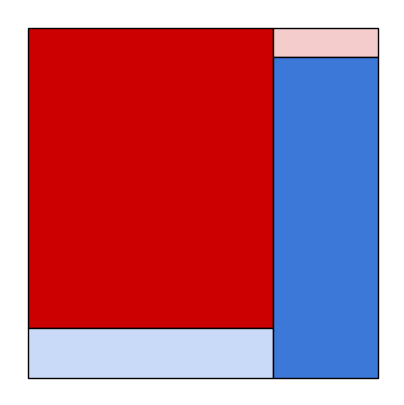

In [132]:
plot_joint_dist_square(60, 2.5, 10, 27.5)

tp: 0.2750, fn: 0.0750, fp: 0.1000, tn: 0.5500
cp: 0.3750, ep: 0.3500
tpr: 0.7857, fpr: 0.1538
ppv: 0.7333, npv: 0.8800


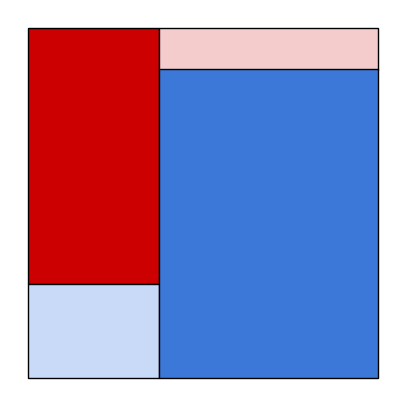

In [133]:
plot_joint_dist_square(30*3/4+20*1/4, 5*3/4+15*1/4, 5*3/4+25*1/4, 60*3/4+40*1/4)

In [29]:
easy_country = [25, 5, 5, 65]
hard_country_race1 = [60, 5, 20, 15]
hard_country_race2 = [10, 15, 15, 60]

In [30]:
def overall_joint_dist(p1, p21):
    tp = p1 * easy_country[0] + (1 - p1) * ((p21 * hard_country_race1[0]) + ((1 - p21) * hard_country_race2[0]))
    fn = p1 * easy_country[1] + (1 - p1) * ((p21 * hard_country_race1[1]) + ((1 - p21) * hard_country_race2[1]))
    fp = p1 * easy_country[2] + (1 - p1) * ((p21 * hard_country_race1[2]) + ((1 - p21) * hard_country_race2[2]))
    tn = p1 * easy_country[3] + (1 - p1) * ((p21 * hard_country_race1[3]) + ((1 - p21) * hard_country_race2[3]))
    return normalize_metric(tp, fn, fp, tn)

tp: 0.2700, fn: 0.0600, fp: 0.0750, tn: 0.5950
cp: 0.3450, ep: 0.3300
tpr: 0.8182, fpr: 0.1119
ppv: 0.7826, npv: 0.9084


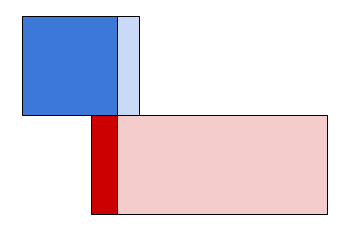

In [35]:
# population 1
# easy country 80%, hard country 20%
# in hard country, race 1 50%, race 2 50%

plot_joint_dist(*overall_joint_dist(0.8, 0.5))

tp: 0.3300, fn: 0.0620, fp: 0.1040, tn: 0.5040
cp: 0.4340, ep: 0.3920
tpr: 0.8418, fpr: 0.1711
ppv: 0.7604, npv: 0.8905


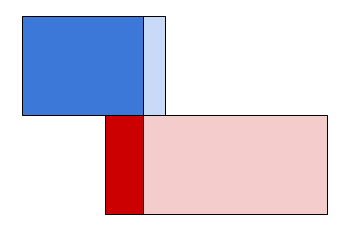

In [37]:
# population 2
# easy country 60%, hard country 40%
# in hard country, race 1 50%, race 2 50%

plot_joint_dist(*overall_joint_dist(0.6, 0.7))

In [33]:
def plot_joint_dist(tp, fn, fp, tn):
    tp, fn, fp, tn = normalize_metric(tp, fn, fp, tn)
    
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)

    cp = tp + fp
    ep = tp + fn

    print(f'tp: {tp:.4f}, fn: {fn:.4f}, fp: {fp:.4f}, tn: {tn:.4f}')
    print(f'cp: {cp:.4f}, ep: {ep:.4f}')
    print(f'tpr: {tpr:.4f}, fpr: {fpr:.4f}')
    print(f'ppv: {ppv:.4f}, npv: {npv:.4f}')
    
    fig = plt.figure()
    ax = fig.add_subplot(111)

    left_bound = max(tp, fp)
    right_bound = max(tn, fn)
    
    # setting the rect height this way will make the figure look square
    rect_linewidth = 1    

    y_gap = tn/(1-cp) - fp / cp

    ax.scatter([-left_bound, right_bound], 
               [-1, 1],
               alpha = 0)

    # setting the rect height this way will make the figure look square
    rect_height = 1
    margin = rect_height / 10
    rect_linewidth = 1    

    tp_rect = Rectangle((-tp, 0),
                        tp, rect_height,
                        fc=tp_color,
                        color ='black',
                        linewidth = rect_linewidth)
    ax.add_patch(tp_rect)

    fn_rect = Rectangle((0, 0),
                        fn, rect_height,
                        fc=fn_color,
                        color ='black',
                        linewidth = rect_linewidth)
    ax.add_patch(fn_rect)

    fp_rect = Rectangle((-fp, -rect_height),
                        fp, rect_height,
                        fc=fp_color,
                        color ='black',
                        linewidth = rect_linewidth)
    ax.add_patch(fp_rect)

    tn_rect = Rectangle((0, -rect_height),
                        tn, rect_height,
                        fc=tn_color,
                        color ='black',
                        linewidth = rect_linewidth)
    ax.add_patch(tn_rect)

    plt.axis('off')
    plt.show()

tp: 0.0878, fn: 0.0122, fp: 0.0564, tn: 0.8436
cp: 0.1442, ep: 0.1000
tpr: 0.8776, fpr: 0.0627
ppv: 0.6087, npv: 0.9857


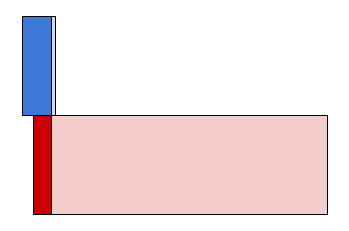

In [29]:
plot_joint_dist(tp_b1, fn_b1, fp_b1, tn_b1)

tp: 0.3000, fn: 0.0500, fp: 0.0500, tn: 0.6000
cp: 0.3500, ep: 0.3500
tpr: 0.8571, fpr: 0.0769
ppv: 0.8571, npv: 0.9231


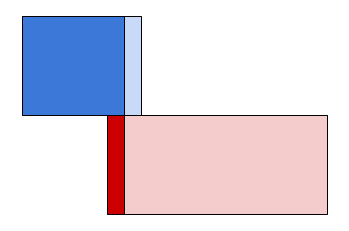

In [39]:
plot_joint_dist(30, 5, 5, 60)

tp: 0.2000, fn: 0.1500, fp: 0.2500, tn: 0.4000
cp: 0.4500, ep: 0.3500
tpr: 0.5714, fpr: 0.3846
ppv: 0.4444, npv: 0.7273


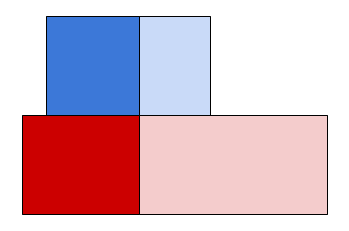

In [40]:
plot_joint_dist(20, 15, 25, 40)

In [30]:
tp= 0.0878
fn= 0.0122
fp= 0.0564
tn= 0.8436

tp / (tp + fp + tn), (tp + tp) / (tp + fp + tn)

(0.08888438955254101, 0.17776877910508201)

In [31]:
0.05 * tp / (tp + fn) + 0.95 * fp / (fp + tn)

0.10343333333333332

In [32]:
0.152-0.0594

0.09259999999999999

In [33]:
(0.059/0.0627) -0.059

0.8819888357256778

In [34]:
1 - 0.8819-0.059-0.0926

-0.033500000000000016

tp: 0.3333, fn: 0.1667, fp: 0.1667, tn: 0.3333
cp: 0.5000, ep: 0.5000
tpr: 0.6667, fpr: 0.3333
ppv: 0.6667, npv: 0.6667


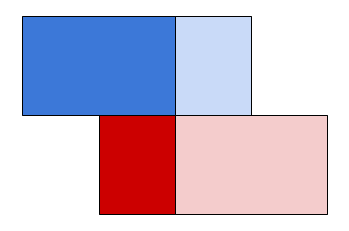

In [35]:
plot_joint_dist(10, 5, 5, 10)

tp: 0.0533, fn: 0.0467, fp: 0.4114, tn: 0.4886
cp: 0.4647, ep: 0.1000
tpr: 0.5329, fpr: 0.4571
ppv: 0.1147, npv: 0.9127


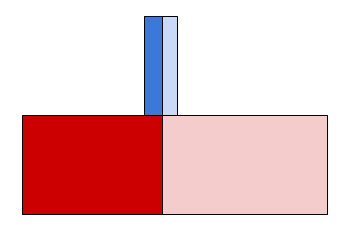

In [36]:
plot_joint_dist(tp_b3, fn_b3, fp_b3, tn_b3)

tp: 0.1818, fn: 0.2727, fp: 0.1818, tn: 0.3636
cp: 0.3636, ep: 0.4545
tpr: 0.4000, fpr: 0.3333
ppv: 0.5000, npv: 0.5714


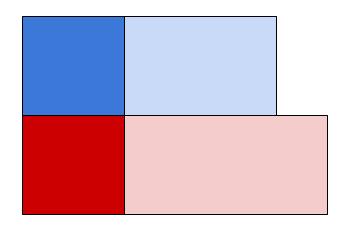

In [37]:
plot_joint_dist(4, 6, 4, 8)

## Plot canvas

In [78]:
tp_b = 4
fn_b = 6
fp_b = 3
tn_b = 8

In [79]:
def ass1(cp_t, tp_b, fn_b, fp_b, tn_b):
    tp_b, fn_b, fp_b, tn_b = normalize_metric(tp_b, fn_b, fp_b, tn_b)

    tpr_b = tp_b / (tp_b + fn_b)
    fpr_b = fp_b / (fp_b + tn_b)
    ppv_b = tp_b / (tp_b + fp_b)
    npv_b = tn_b / (tn_b + fn_b)

    slope1 = 1 / (tp_b/(tp_b+fn_b) - fp_b/(fp_b+tn_b))
    ep1 = slope1 * cp_t - fpr_b / (tpr_b - fpr_b)
    ep1_val = (cp_t - fpr_b) / (tpr_b - fpr_b)
    
    return ep1

In [80]:
def compute_cm_metric_ass1(cm_cp, cm_ep, tp, fn, fp, tn):
#     cm_tp / cm_fn = tp / fn
#     cm_fp / cm_tn = fp / tn
#     cm_tp + cm_fp = cm_cp
#     cm_fn + cm_tn = 1 - cm_cp
    
#     cm_tp + cm_fn = tp / fn * cm_fn + cm_fn = cm_ep
#     cm_fp + cm_tn = fp / tn * cm_tn + cm_tn = 1 - cm_ep
    
    cm_fn = cm_ep / (tp / fn + 1)
    cm_tp = tp / fn * cm_fn
    cm_tn = (1 - cm_ep) / (fp / tn + 1)
    cm_fp = cm_tn * fp / tn
    
    return normalize_metric(cm_tp, cm_fn, cm_fp, cm_tn)

In [81]:
def plot_ass1(tp, fn, fp, tn, cp_t1, cp_t2):
    tp, fn, fp, tn = normalize_metric(tp, fn, fp, tn)

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)

    cp = tp + fp
    ep = tp + fn

    print(f'tp: {tp:.4f}, fn: {fn:.4f}, fp: {fp:.4f}, tn: {tn:.4f}')
    print(f'cp: {cp:.4f}, ep: {ep:.4f}')
    print(f'tpr: {tpr:.4f}, fpr: {fpr:.4f}')
    print(f'ppv: {ppv:.4f}, npv: {npv:.4f}')
    
    # prepare the canvas
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)

    # base x and y axis
    ax.annotate('', xy=(0, 1.1), xytext=(0, 0),
                arrowprops=dict(arrowstyle='->', lw=1), fontsize=20, zorder=-30)

    ax.annotate('', xy=(1.1, 0), xytext=(0, 0),
                arrowprops=dict(arrowstyle='->', lw=1), fontsize=20, zorder=-30)

    # TODO: this block is assumption-dependent
    # start of the block
    # two non-compatible areas
    nc_rect1 = Rectangle((0, 0), fpr, 1, 
                         fc=light_gray_color, color='black', linewidth=1, zorder=-30)
    ax.add_patch(nc_rect1)

    nc_rect2 = Rectangle((tpr, 0), 1-tpr, 1,
                         fc=light_gray_color, color='black', linewidth=1, zorder=-30)
    ax.add_patch(nc_rect2)

    # annotation on the x-axis
    x_left_bound = fpr
    x_right_bound = tpr
    x_left_bound_text = '$FPR_B$'
    x_right_bound_text = '$TPR_B$'
    x_text_upper_margin = 0.03
    x_label_upper_margin = 0.3
    x_dashed_limit = 0.35

    plt.text(x_left_bound, -x_text_upper_margin, x_left_bound_text, 
             ha='right', va='top', size=20)
    plt.text(x_right_bound, -x_text_upper_margin, x_right_bound_text, 
             ha='left', va='top', size=20)

    plt.vlines(x=x_left_bound, ymin=-x_dashed_limit, ymax=0, 
               ls=(0, (5, 10)), color='black', lw=1)
    plt.vlines(x=x_right_bound, ymin=-x_dashed_limit, ymax=0, 
               ls=(0, (5, 10)), color='black', lw=1)

    ax.annotate('$cp_T$', 
                xy=(x_right_bound, -x_label_upper_margin), 
                xytext=((x_left_bound+x_right_bound)/2, -x_label_upper_margin), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle='->'), fontsize=22)
    ax.annotate('', 
                xy=(x_left_bound, -x_label_upper_margin), 
                xytext=((x_left_bound+x_right_bound)/2-0.05, -x_label_upper_margin), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle='->'), fontsize=22)

    # annotation on the y-axis
    y_upper_bound = 1
    y_lower_bound = 0
    y_upper_bound_text = '1'
    y_lower_bound_text = '0'
    y_text_right_margin = 0.03
    y_label_right_margin = 0.3
    y_dashed_limit = 0.35
    
    plt.text(-y_label_right_margin, y_upper_bound+0.01, y_upper_bound_text, 
             ha='center', va='bottom', size=20)
    plt.text(-y_label_right_margin, y_lower_bound-0.01, y_lower_bound_text, 
             ha='center', va='top', size=20)

    plt.hlines(y=y_upper_bound, xmin=-y_dashed_limit, xmax=0, 
               ls=(0, (5, 10)), color='black', lw=1)
    plt.hlines(y=y_lower_bound, xmin=-y_dashed_limit, xmax=0, 
               ls=(0, (5, 10)), color='black', lw=1)

    ax.annotate('$ep_T$', xy=(-y_label_right_margin, y_upper_bound), 
                xytext=(-y_label_right_margin, (y_upper_bound+y_lower_bound)/2), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle="->"), fontsize=22)
    ax.annotate('', xy=(-y_label_right_margin, y_lower_bound), 
                xytext=(-y_label_right_margin, (y_upper_bound+y_lower_bound)/2-0.05), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle="->"), fontsize=22)

    # three case points
    ep_t1 = ass1(cp_t1, tp, fn, fp, tn)
    ep_t2 = ass1(cp_t2, tp, fn, fp, tn)
    ax.scatter([cp, cp_t1, cp_t2], [ep, ep_t1, ep_t2], ec='black', fc='none', linewidth=1)
    
    # two end points
    ax.plot([fpr, tpr], [0, 1], 'k-', linewidth=1, zorder=-10)
    ax.scatter([fpr, tpr], [0, 1], ec='black', fc='black', linewidth=1)

    left_bound = max(tp, fp)
    right_bound = max(tn, fn)

    rect_height = (left_bound + right_bound) / 2
    
    scale = 8
    cm_left_bound = left_bound / scale
    cm_right_bound = right_bound / scale
    rect_linewidth = 1 / scale
    # setting the rect height this way will make the figure look square
    rect_height = (cm_left_bound + cm_right_bound) / 2

    for idx, cm_cp, cm_ep in zip(['', '', 'B', 1, 2], [fpr, tpr, cp, cp_t1, cp_t2], [0, 1, ep, ep_t1, ep_t2]):            
        if 0 < cm_cp < 1 and 0 < cm_ep < 1:
            plt.vlines(x=cm_cp, ymin=0, ymax=cm_ep, ls=(0, (5, 10)), color='black', lw=1, zorder=-10)
            plt.hlines(y=cm_ep, xmin=0, xmax=cm_cp, ls=(0, (5, 10)), color='black', lw=1, zorder=-10)
            if idx == 'B':
                plt.text(cm_cp, -x_text_upper_margin, '$cp_{}$'.format(idx), 
                         ha='center', va='top', size=20)
                plt.text(-y_text_right_margin, cm_ep, '$ep_{}$'.format(idx), 
                          ha='right', va='center', size=20)
            else:
                plt.text(cm_cp, -x_text_upper_margin, f'{cm_cp:.2f}', 
                         ha='center', va='top', size=20)
                plt.text(-y_text_right_margin, cm_ep, f'{cm_ep:.2f}', 
                         ha='right', va='center', size=20)

        center_point_x = cm_cp - 0.06
        if cm_ep == 1:
            center_point_y = cm_ep + 0.06 - rect_height
        else:
            center_point_y = cm_ep + 0.06

        cm_tp, cm_fn, cm_fp, cm_tn = compute_cm_metric_ass1(cm_cp, cm_ep, tp, fn, fp, tn)
        
        print('cp_t', cm_cp, 'ep_t', cm_tp+cm_fn)
        print(cm_tp, cm_fn, cm_fp, cm_tn)

        cm_tp /= scale
        cm_fn /= scale
        cm_fp /= scale
        cm_tn /= scale

        if cm_tp > 0:
            tp_rect = Rectangle((center_point_x - cm_tp, center_point_y),
                                cm_tp, rect_height,
                                fc=tp_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(tp_rect)

        if cm_fn > 0:
            fn_rect = Rectangle((center_point_x, center_point_y),
                                cm_fn, rect_height,
                                fc=fn_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(fn_rect)

        if cm_fp > 0:
            fp_rect = Rectangle((center_point_x - cm_fp, center_point_y - rect_height),
                                cm_fp, rect_height,
                                fc=fp_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(fp_rect)

        if cm_tn > 0:
            tn_rect = Rectangle((center_point_x, center_point_y - rect_height),
                                cm_tn, rect_height,
                                fc=tn_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(tn_rect)

    # one end point
    point1_x, point1_y = tpr, 1
    cm_tp, cm_fn, cm_fp, cm_tn = compute_cm_metric_ass1(point1_x, point1_y, tp, fn, fp, tn)
    cm_tp /= scale
    cm_fn /= scale
    new_height = rect_height*2/3

    center_point_x = point1_x + 0.01
    center_point_y = x_label_upper_margin

    if cm_tp > 0:
        tp_rect = Rectangle((center_point_x + cm_fn/2, -center_point_y + 0.01),
                            cm_tp, new_height,
                            fc=tp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tp_rect)

        tp_rect = Rectangle((center_point_x, -center_point_y - new_height - 0.01),
                            cm_tp, new_height,
                            fc=tp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tp_rect)

    if cm_fn > 0:
        fn_rect = Rectangle((center_point_x + cm_tp, -center_point_y - new_height - 0.01),
                            cm_fn, new_height,
                            fc=fn_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fn_rect)

    ax.plot([center_point_x, center_point_x + cm_tp + cm_fn], [-center_point_y, -center_point_y], 'k-', linewidth=1)

    # the other end point
    point2_x, point2_y = fpr, 0
    cm_tp, cm_fn, cm_fp, cm_tn = compute_cm_metric_ass1(point2_x, point2_y, tp, fn, fp, tn)
    cm_fp /= scale
    cm_tn /= scale
    new_height = rect_height*2/3

    center_point_x = point2_x - 0.01 - cm_tn
    center_point_y = x_label_upper_margin
    
    if cm_fp > 0:
        fp_rect = Rectangle((center_point_x - cm_fp + cm_tn/2, -center_point_y + 0.01),
                            cm_fp, new_height,
                            fc=fp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fp_rect)

        fp_rect = Rectangle((center_point_x - cm_fp, -center_point_y - new_height - 0.01),
                            cm_fp, new_height,
                            fc=fp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fp_rect)

    if cm_tn > 0:
        tn_rect = Rectangle((center_point_x, -center_point_y - new_height - 0.01),
                            cm_tn, new_height,
                            fc=tn_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tn_rect)

    ax.plot([center_point_x - cm_fp, center_point_x + cm_tn], [-center_point_y, -center_point_y], 'k-', linewidth=1)

    # canvas size
    ax.set_xlim(-0.4, 1.15)
    ax.set_ylim(-0.4, 1.15)

    plt.axis('off')
    plt.tight_layout()
    # plt.show()
    plt.savefig('assumption1.png', dpi=1000)

In [82]:
# strong
# 8018, 1981, 13510, 76489

# weak
# 5761, 4239, 37328, 52672

tp: 0.1905, fn: 0.2857, fp: 0.1429, tn: 0.3810
cp: 0.3333, ep: 0.4762
tpr: 0.4000, fpr: 0.2727
ppv: 0.5714, npv: 0.5714
cp_t 0.27272727272727276 ep_t 0.0
0.0 0.0 0.2727272727272727 0.7272727272727273
cp_t 0.4 ep_t 1.0
0.4 0.6000000000000001 0.0 0.0
cp_t 0.3333333333333333 ep_t 0.47619047619047616
0.19047619047619047 0.2857142857142857 0.14285714285714288 0.380952380952381
cp_t 0.2 ep_t -0.5714285714285717
-0.22857142857142868 -0.342857142857143 0.42857142857142866 1.142857142857143
cp_t 0.5 ep_t 1.7857142857142856
0.7142857142857142 1.0714285714285714 -0.21428571428571425 -0.5714285714285713


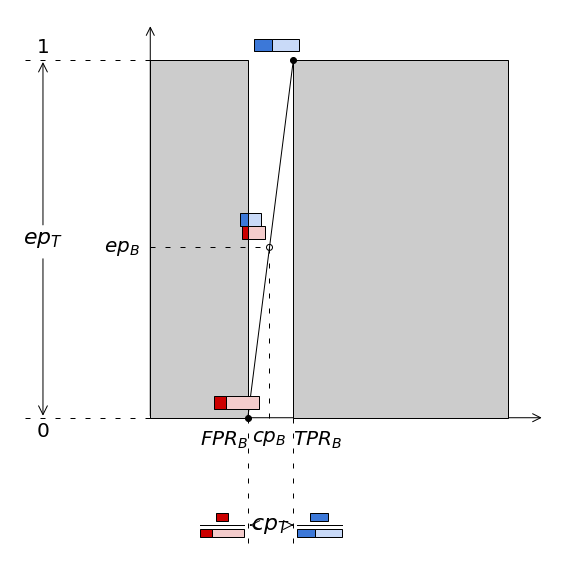

In [83]:

cp_t1 = 0.2
cp_t2 = 0.5
plot_ass1(tp_b, fn_b, fp_b, tn_b, cp_t1, cp_t2)

# assumption 2

In [44]:
def ass2(cp_t, tp_b, fn_b, fp_b, tn_b):
    tp_b, fn_b, fp_b, tn_b = normalize_metric(tp_b, fn_b, fp_b, tn_b)

    tpr_b = tp_b / (tp_b + fn_b)
    fpr_b = fp_b / (fp_b + tn_b)
    ppv_b = tp_b / (tp_b + fp_b)
    npv_b = tn_b / (tn_b + fn_b)

    slope2 = tp_b/(tp_b+fp_b) - fn_b/(fn_b+tn_b)
    ep2 = slope2 * cp_t + 1 - npv_b
    ep2_val = (1 - cp_t) * (1 - npv_b) + cp_t * ppv_b    

    return ep2

In [45]:
def compute_cm_metric_ass2(cm_cp, cm_ep, tp, fn, fp, tn):
#     cm_tp / cm_fp = tp / fp
#     cm_tn / cm_fn = tn / fn
#     cm_tp + cm_fp = cm_cp
#     cm_fn + cm_tn = 1 - cm_cp
    
#     cm_tp + cm_fp = tp / fp * cm_fp + cm_fp = cm_cp
#     cm_fn + cm_tn = tn / fn * cm_fn + cm_fn = 1 - cm_cp
    
    cm_fp = cm_cp / (tp / fp + 1)
    cm_tp = tp / fp * cm_fp
    cm_fn = (1 - cm_cp) / (tn / fn + 1)
    cm_tn = cm_fn * tn / fn
    
    return normalize_metric(cm_tp, cm_fn, cm_fp, cm_tn)

In [46]:
def plot_ass2(tp, fn, fp, tn, cp_t1, cp_t2):
    tp, fn, fp, tn = normalize_metric(tp, fn, fp, tn)

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)

    cp = tp + fp
    ep = tp + fn

    print(f'tp: {tp:.4f}, fn: {fn:.4f}, fp: {fp:.4f}, tn: {tn:.4f}')
    print(f'cp: {cp:.4f}, ep: {ep:.4f}')
    print(f'tpr: {tpr:.4f}, fpr: {fpr:.4f}')
    print(f'ppv: {ppv:.4f}, npv: {npv:.4f}')
    
    # prepare the canvas
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)

    # base x and y axis
    ax.annotate('', xy=(0, 1.1), xytext=(0, 0),
                arrowprops=dict(arrowstyle='->', lw=1), fontsize=20, zorder=-30)

    ax.annotate('', xy=(1.1, 0), xytext=(0, 0),
                arrowprops=dict(arrowstyle='->', lw=1), fontsize=20, zorder=-30)

    # TODO: this block is assumption-dependent
    # start of the block
    # two non-compatible areas
    nc_rect1 = Rectangle((0, 0), 1, 1-npv, 
                         fc=light_gray_color, color='black', linewidth=1, zorder=-30)
    ax.add_patch(nc_rect1)

    nc_rect2 = Rectangle((0, ppv), 1, 1-ppv,
                         fc=light_gray_color, color='black', linewidth=1, zorder=-30)
    ax.add_patch(nc_rect2)

    # annotation on the x-axis
    x_left_bound = 0
    x_right_bound = 1
    x_left_bound_text = '0'
    x_right_bound_text = '1'
    x_text_upper_margin = 0.03
    x_label_upper_margin = 0.3
    x_dashed_limit = 0.35

    plt.text(x_left_bound, -x_text_upper_margin, x_left_bound_text, 
             ha='right', va='top', size=20)
    plt.text(x_right_bound, -x_text_upper_margin, x_right_bound_text, 
             ha='left', va='top', size=20)

    plt.vlines(x=x_left_bound, ymin=-x_dashed_limit, ymax=0, 
               ls=(0, (5, 10)), color='black', lw=1)
    plt.vlines(x=x_right_bound, ymin=-x_dashed_limit, ymax=0, 
               ls=(0, (5, 10)), color='black', lw=1)

    ax.annotate('$cp_T$', 
                xy=(x_right_bound, -x_label_upper_margin), 
                xytext=((x_left_bound+x_right_bound)/2, -x_label_upper_margin), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle='->'), fontsize=22)
    ax.annotate('', 
                xy=(x_left_bound, -x_label_upper_margin), 
                xytext=((x_left_bound+x_right_bound)/2-0.05, -x_label_upper_margin), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle='->'), fontsize=22)

    # annotation on the y-axis
    y_upper_bound = ppv
    y_lower_bound = 1 - npv
    y_upper_bound_text = '$PPV_B$'
    y_lower_bound_text = '$1 - NPV_B$'
    y_text_right_margin = 0.02
    y_label_right_margin = 0.3
    y_dashed_limit = 0.35
    
    plt.text(-y_text_right_margin, y_upper_bound+0.01, y_upper_bound_text, 
             ha='right', va='bottom', size=20)
    plt.text(-y_text_right_margin, y_lower_bound-0.01, y_lower_bound_text, 
             ha='right', va='top', size=20)

    plt.hlines(y=y_upper_bound, xmin=-y_dashed_limit, xmax=0, 
               ls=(0, (5, 10)), color='black', lw=1)
    plt.hlines(y=y_lower_bound, xmin=-y_dashed_limit, xmax=0, 
               ls=(0, (5, 10)), color='black', lw=1)

    ax.annotate('$ep_T$', xy=(-y_label_right_margin, y_upper_bound), 
                xytext=(-y_label_right_margin, (y_upper_bound+y_lower_bound)/2), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle="->"), fontsize=22)
    ax.annotate('', xy=(-y_label_right_margin, y_lower_bound), 
                xytext=(-y_label_right_margin, (y_upper_bound+y_lower_bound)/2-0.05), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle="->"), fontsize=22)

    # three case points
    ep_t1 = ass2(cp_t1, tp, fn, fp, tn)
    ep_t2 = ass2(cp_t2, tp, fn, fp, tn)
    ax.scatter([cp, cp_t1, cp_t2], [ep, ep_t1, ep_t2], ec='black', fc='none', linewidth=1)
    
    # two end points
    ax.plot([0, 1], [1-npv, ppv], 'k-', linewidth=1, zorder=-10)
    ax.scatter([0, 1], [1-npv, ppv], ec='black', fc='black', linewidth=1)

    left_bound = max(tp, fp)
    right_bound = max(tn, fn)

    rect_height = (left_bound + right_bound) / 2
    
    scale = 8
    cm_left_bound = left_bound / scale
    cm_right_bound = right_bound / scale
    rect_linewidth = 1 / scale
    # setting the rect height this way will make the figure look square
    rect_height = (cm_left_bound + cm_right_bound) / 2

    for idx, cm_cp, cm_ep in zip(['', '', 'B', 1, 2], [0, 1, cp, cp_t1, cp_t2], [1-npv, ppv, ep, ep_t1, ep_t2]):            
        if 0 < cm_cp < 1 and 0 < cm_ep < 1:
            plt.vlines(x=cm_cp, ymin=0, ymax=cm_ep, ls=(0, (5, 10)), color='black', lw=1, zorder=-10)
            plt.hlines(y=cm_ep, xmin=0, xmax=cm_cp, ls=(0, (5, 10)), color='black', lw=1, zorder=-10)
            if idx == 'B':
                plt.text(cm_cp, -x_text_upper_margin, '$cp_{}$'.format(idx), 
                         ha='center', va='top', size=20)
                plt.text(-y_text_right_margin, cm_ep, '$ep_{}$'.format(idx), 
                          ha='right', va='center', size=20)
            else:
                plt.text(cm_cp, -x_text_upper_margin, f'{cm_cp:.2f}', 
                         ha='center', va='top', size=20)
                plt.text(-y_text_right_margin, cm_ep, f'{cm_ep:.2f}', 
                         ha='right', va='center', size=20)

        center_point_x = cm_cp - 0.06
        if cm_ep == 1:
            center_point_y = cm_ep + 0.06 - rect_height
        else:
            center_point_y = cm_ep + 0.06

        cm_tp, cm_fn, cm_fp, cm_tn = compute_cm_metric_ass2(cm_cp, cm_ep, tp, fn, fp, tn)

        cm_tp /= scale
        cm_fn /= scale
        cm_fp /= scale
        cm_tn /= scale
        
        print(cm_tp, cm_fn, cm_fp, cm_tn)

        if cm_tp > 0:
            tp_rect = Rectangle((center_point_x - cm_tp, center_point_y),
                                cm_tp, rect_height,
                                fc=tp_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(tp_rect)

        if cm_fn > 0:
            fn_rect = Rectangle((center_point_x, center_point_y),
                                cm_fn, rect_height,
                                fc=fn_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(fn_rect)

        if cm_fp > 0:
            fp_rect = Rectangle((center_point_x - cm_fp, center_point_y - rect_height),
                                cm_fp, rect_height,
                                fc=fp_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(fp_rect)

        if cm_tn > 0:
            tn_rect = Rectangle((center_point_x, center_point_y - rect_height),
                                cm_tn, rect_height,
                                fc=tn_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(tn_rect)

    # one end point
    point1_x, point1_y = 0, 1 - npv
    cm_tp, cm_fn, cm_fp, cm_tn = compute_cm_metric_ass2(point1_x, point1_y, tp, fn, fp, tn)
    cm_fn /= scale
    cm_tn /= scale
    new_height = rect_height*2/3

    center_point_x = -y_label_right_margin - cm_tn/2
    center_point_y = 1 - npv
    
#     plt.text(-y_label_right_margin, y_upper_bound+0.01, y_upper_bound_text, 
#              ha='center', va='bottom', size=20)
#     plt.text(-y_label_right_margin, y_lower_bound-0.01, y_lower_bound_text, 
#              ha='center', va='top', size=20)

    print(cm_tp, cm_fn, cm_fp, cm_tn, new_height)
    if cm_fn > 0:
        fn_rect = Rectangle((center_point_x -cm_fn + cm_tn/2, center_point_y - 0.02 - new_height),
                            cm_fn, new_height,
                            fc=fn_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fn_rect)

        fn_rect = Rectangle((center_point_x - cm_fn, center_point_y - 0.04 - 2 * new_height),
                            cm_fn, new_height,
                            fc=fn_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fn_rect)
        print(cm_fn)
        print('11')

    if cm_tn > 0:
        tn_rect = Rectangle((center_point_x, center_point_y - 0.04 - 2 * new_height),
                            cm_tn, new_height,
                            fc=tn_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tn_rect)
        print(cm_tn)
        print('12')

    ax.plot([center_point_x - cm_fn, center_point_x + cm_tn], [center_point_y - 0.03 - new_height, center_point_y - 0.03 - new_height], 'k-', linewidth=1)

    # the other end point
    point2_x, point2_y = 1, ppv
    cm_tp, cm_fn, cm_fp, cm_tn = compute_cm_metric_ass2(point2_x, point2_y, tp, fn, fp, tn)
    cm_tp /= scale
    cm_fp /= scale
    new_height = rect_height*2/3

    center_point_x = -y_label_right_margin - cm_tn/2
    center_point_y = ppv
    
    print(cm_tp, cm_fn, cm_fp, cm_tn, new_height)
    if cm_tp > 0:
        tp_rect = Rectangle((center_point_x - cm_tp + cm_fp/2, center_point_y + 0.04 + 2 * new_height),
                            cm_tp, new_height,
                            fc=tp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tp_rect)

        tp_rect = Rectangle((center_point_x - cm_tp, center_point_y + 0.02 + new_height),
                            cm_tp, new_height,
                            fc=tp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tp_rect)

    if cm_fp > 0:
        fp_rect = Rectangle((center_point_x, center_point_y + 0.02 + new_height),
                            cm_fp, new_height,
                            fc=fp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fp_rect)

    ax.plot([center_point_x - cm_tp, center_point_x + cm_fp], 
            [center_point_y + 0.03 + 2 * new_height, center_point_y + 0.03 + 2 * new_height], 'k-', linewidth=1)

    # canvas size
    ax.set_xlim(-0.4, 1.15)
    ax.set_ylim(-0.4, 1.15)

    plt.axis('off')
    plt.tight_layout()
    # plt.show()
    plt.savefig('assumption2.png', dpi=1000)

tp: 0.1818, fn: 0.2727, fp: 0.1818, tn: 0.3636
cp: 0.3636, ep: 0.4545
tpr: 0.4000, fpr: 0.3333
ppv: 0.5000, npv: 0.5714
0.0 0.05357142857142857 0.0 0.07142857142857144
0.0625 0.0 0.0625 0.0
0.022727272727272728 0.03409090909090909 0.022727272727272728 0.045454545454545456
0.0125 0.04285714285714286 0.0125 0.05714285714285715
0.03125 0.026785714285714284 0.03125 0.03571428571428572
0.0 0.05357142857142857 0.0 0.07142857142857144 0.022727272727272724
0.05357142857142857
11
0.07142857142857144
12
0.0625 0.0 0.0625 0.0 0.022727272727272724


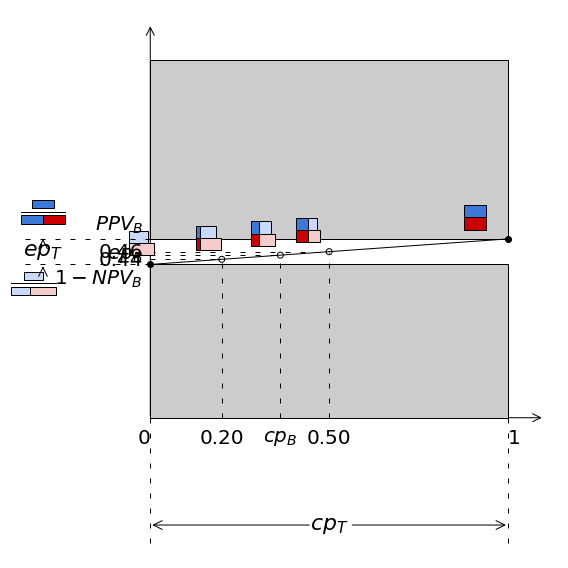

In [76]:
tp_b, fn_b, fp_b, tn_b = 4, 2, 1, 8
tp_b, fn_b, fp_b, tn_b = 4, 6, 4, 8
# tp_b, fn_b, fp_b, tn_b = 5761, 4239, 37328, 52672
# tp_b, fn_b, fp_b, tn_b = 8731, 1269, 5691, 84309
# tp_b, fn_b, fp_b, tn_b = 8018, 1981, 13510, 76489

cp_t1 = 0.2
cp_t2 = 0.5
plot_ass2(tp_b, fn_b, fp_b, tn_b, cp_t1, cp_t2)

# assumption 3

In [48]:
def ass3(cp_t, tp_b, fn_b, fp_b, tn_b):
    tp_b, fn_b, fp_b, tn_b = normalize_metric(tp_b, fn_b, fp_b, tn_b)

    tpr_b = tp_b / (tp_b + fn_b)
    fpr_b = fp_b / (fp_b + tn_b)
    ppv_b = tp_b / (tp_b + fp_b)
    npv_b = tn_b / (tn_b + fn_b)
    
    slope3 = (tp_b + fn_b) / (tp_b + fp_b)
    ep3 = slope3 * cp_t
    ep3_val = cp_t * ppv_b / tpr_b

    return ep3

In [49]:
def compute_cm_metric_ass3(cm_cp, cm_ep, tp, fn, fp, tn):
#     cm_tp / cm_fp = tp / fp
#     cm_tp / cm_fn = tp / fn
#     cm_tp + cm_fp = cm_cp
#     cm_fn + cm_tn = 1 - cm_cp
    
#     cm_tp + cm_fp = tp / fp * cm_fp + cm_fp = cm_cp
#     cm_fn = fn / tp * cm_tp
    
    cm_fp = cm_cp / (tp / fp + 1)
    cm_tp = tp / fp * cm_fp
    cm_fn = fn / tp * cm_tp
    cm_tn = 1 - cm_fp - cm_tp - cm_fn
    
    return normalize_metric(cm_tp, cm_fn, cm_fp, cm_tn)

In [50]:
def plot_ass3(tp, fn, fp, tn, cp_t1, cp_t2):
    tp, fn, fp, tn = normalize_metric(tp, fn, fp, tn)

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)

    cp = tp + fp
    ep = tp + fn

    print(f'tp: {tp:.4f}, fn: {fn:.4f}, fp: {fp:.4f}, tn: {tn:.4f}')
    print(f'cp: {cp:.4f}, ep: {ep:.4f}')
    print(f'tpr: {tpr:.4f}, fpr: {fpr:.4f}')
    print(f'ppv: {ppv:.4f}, npv: {npv:.4f}')
    
    # prepare the canvas
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)

    # base x and y axis
    ax.annotate('', xy=(0, 1.1), xytext=(0, 0),
                arrowprops=dict(arrowstyle='->', lw=1), fontsize=20, zorder=-30)

    ax.annotate('', xy=(1.1, 0), xytext=(0, 0),
                arrowprops=dict(arrowstyle='->', lw=1), fontsize=20, zorder=-30)

    # TODO: this block is assumption-dependent
    # start of the block
    # two non-compatible areas
    nc_rect1 = Rectangle((0, (tp+fn) / (tp+fn+fp)), 1, 1-(tp+fn) / (tp+fn+fp), 
                         fc=light_gray_color, color='black', linewidth=1, zorder=-30)
    ax.add_patch(nc_rect1)

    nc_rect2 = Rectangle(((tp+fp) / (tp+fn+fp), 0), 1 - (tp+fp) / (tp+fn+fp), 1,
                         fc=light_gray_color, color='black', linewidth=1, zorder=-30)
    ax.add_patch(nc_rect2)
    
    nc_rect1 = Rectangle(((tp+fp) / (tp+fn+fp) - 0.01, (tp+fn) / (tp+fn+fp)), 0.02, 1-(tp+fn) / (tp+fn+fp)-0.004, 
                         fc=light_gray_color, color='black', linewidth=0, zorder=-30)
    ax.add_patch(nc_rect1)

    # annotation on the x-axis
    x_left_bound = 0
    x_right_bound = (tp+fp) / (tp+fn+fp)
    x_left_bound_text = '0'
    x_right_bound_text = '1'
    x_text_upper_margin = 0.03
    x_label_upper_margin = 0.3
    x_dashed_limit = 0.35

    plt.text(x_left_bound, -x_label_upper_margin, x_left_bound_text, 
             ha='right', va='top', size=20)
#     plt.text(x_right_bound, -x_text_upper_margin, x_right_bound_text, 
#              ha='left', va='top', size=20)

    plt.vlines(x=x_left_bound, ymin=-x_dashed_limit, ymax=0, 
               ls=(0, (5, 10)), color='black', lw=1)
    plt.vlines(x=x_right_bound, ymin=-x_dashed_limit, ymax=0, 
               ls=(0, (5, 10)), color='black', lw=1)

    ax.annotate('$cp_T$', 
                xy=(x_right_bound, -x_label_upper_margin), 
                xytext=((x_left_bound+x_right_bound)/2, -x_label_upper_margin), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle='->'), fontsize=22)
    ax.annotate('', 
                xy=(x_left_bound, -x_label_upper_margin), 
                xytext=((x_left_bound+x_right_bound)/2-0.05, -x_label_upper_margin), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle='->'), fontsize=22)

    # annotation on the y-axis
    y_upper_bound = (tp+fn) / (tp+fn+fp)
    y_lower_bound = 0
    y_upper_bound_text = '0'
    y_lower_bound_text = '0'
    y_text_right_margin = 0.02
    y_label_right_margin = 0.3
    y_dashed_limit = 0.35
    
#     plt.text(-y_label_right_margin, y_upper_bound+0.01, y_upper_bound_text, 
#              ha='right', va='bottom', size=20)
    plt.text(-y_label_right_margin, y_lower_bound-0.01, y_lower_bound_text, 
             ha='right', va='top', size=20)

    plt.hlines(y=y_upper_bound, xmin=-y_dashed_limit, xmax=0, 
               ls=(0, (5, 10)), color='black', lw=1)
    plt.hlines(y=y_lower_bound, xmin=-y_dashed_limit, xmax=0, 
               ls=(0, (5, 10)), color='black', lw=1)

    ax.annotate('$ep_T$', xy=(-y_label_right_margin, y_upper_bound), 
                xytext=(-y_label_right_margin, (y_upper_bound+y_lower_bound)/2), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle="->"), fontsize=22)
    ax.annotate('', xy=(-y_label_right_margin, y_lower_bound), 
                xytext=(-y_label_right_margin, (y_upper_bound+y_lower_bound)/2-0.05), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle="->"), fontsize=22)

    # three case points
    ep_t1 = ass3(cp_t1, tp, fn, fp, tn)
    ep_t2 = ass3(cp_t2, tp, fn, fp, tn)
    cp_left = 0
    cp_right = (tp+fp) / (tp+fp+fn)
    ep_left = ass3(cp_left, tp, fn, fp, tn)
    ep_right = ass3(cp_right, tp, fn, fp, tn)
    
    print(cp_left, ep_left)
    print('val', cp_right, ep_right)
    ax.scatter([cp, cp_t1, cp_t2], [ep, ep_t1, ep_t2], ec='black', fc='none', linewidth=1)
    
    # two end points
    ax.plot([cp_left, cp_right], [ep_left, ep_right], 'ok-', linewidth=1, zorder=-10)
#     ax.scatter([0, 1], [1-npv, ppv], ec='black', fc='black', linewidth=1)

    left_bound = max(tp, fp)
    right_bound = max(tn, fn)

    rect_height = (left_bound + right_bound) / 2
    
    scale = 8
    cm_left_bound = left_bound / scale
    cm_right_bound = right_bound / scale
    rect_linewidth = 1 / scale
    # setting the rect height this way will make the figure look square
    rect_height = (cm_left_bound + cm_right_bound) / 2

    for idx, cm_cp, cm_ep in zip(['', '', 'B', 1, 2], [cp_left, cp_right, cp, cp_t1, cp_t2], [ep_left, ep_right, ep, ep_t1, ep_t2]):            
        if cp_left < cm_cp < cp_right and ep_left < cm_ep < ep_right:
            plt.vlines(x=cm_cp, ymin=0, ymax=cm_ep, ls=(0, (5, 10)), color='black', lw=1, zorder=-10)
            plt.hlines(y=cm_ep, xmin=0, xmax=cm_cp, ls=(0, (5, 10)), color='black', lw=1, zorder=-10)
            if idx == 'B':
                plt.text(cm_cp, -x_text_upper_margin, '$cp_{}$'.format(idx), 
                         ha='center', va='top', size=20)
                plt.text(-y_text_right_margin, cm_ep, '$ep_{}$'.format(idx), 
                          ha='right', va='center', size=20)
            else:
                plt.text(cm_cp, -x_text_upper_margin, f'{cm_cp:.2f}', 
                         ha='center', va='top', size=20)
                plt.text(-y_text_right_margin, cm_ep, f'{cm_ep:.2f}', 
                         ha='right', va='center', size=20)

        center_point_x = cm_cp - 0.06
        if cm_ep == 1:
            center_point_y = cm_ep + 0.06 - rect_height
        else:
            center_point_y = cm_ep + 0.06

        cm_tp, cm_fn, cm_fp, cm_tn = compute_cm_metric_ass3(cm_cp, cm_ep, tp, fn, fp, tn)

        cm_tp /= scale
        cm_fn /= scale
        cm_fp /= scale
        cm_tn /= scale
        
        print(cm_tp, cm_fn, cm_fp, cm_tn)

        if cm_tp > 0:
            tp_rect = Rectangle((center_point_x - cm_tp, center_point_y),
                                cm_tp, rect_height,
                                fc=tp_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(tp_rect)

        if cm_fn > 0:
            fn_rect = Rectangle((center_point_x, center_point_y),
                                cm_fn, rect_height,
                                fc=fn_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(fn_rect)

        if cm_fp > 0:
            fp_rect = Rectangle((center_point_x - cm_fp, center_point_y - rect_height),
                                cm_fp, rect_height,
                                fc=fp_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(fp_rect)

        if cm_tn > 0:
            tn_rect = Rectangle((center_point_x, center_point_y - rect_height),
                                cm_tn, rect_height,
                                fc=tn_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(tn_rect)

    # one end point
    point1_x, point1_y = cp_right, ep_right
    cm_tp, cm_fn, cm_fp, cm_tn = compute_cm_metric_ass3(point1_x, point1_y, tp, fn, fp, tn)
    cm_tp /= scale
    cm_fn /= scale
    cm_fp /= scale
    new_height = rect_height*2/3

    center_point_x = -y_label_right_margin - (cm_tp + cm_fn + cm_fp)/2
    center_point_y = ep_right

    print(cm_tp, cm_fn, cm_fp, cm_tn, new_height)
    if cm_tp > 0:
        tp_rect = Rectangle((center_point_x - cm_fp, center_point_y + 0.02 + new_height),
                            cm_tp, new_height,
                            fc=tp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tp_rect)

        tp_rect = Rectangle((center_point_x - cm_fp + cm_fp/2, center_point_y + 0.04 + 2 * new_height),
                            cm_tp, new_height,
                            fc=tp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tp_rect)

    if cm_fp > 0:
        fp_rect = Rectangle((center_point_x - cm_fp + cm_tp, center_point_y + 0.02 + new_height),
                            cm_fp, new_height,
                            fc=fp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fp_rect)

    if cm_fn > 0:
        fn_rect = Rectangle((center_point_x + cm_tp, center_point_y + 0.02 + new_height),
                            cm_fn, new_height,
                            fc=fn_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fn_rect)
        
        fn_rect = Rectangle((center_point_x + cm_tp + cm_fp/2 - cm_fp, center_point_y + 0.04 + 2 * new_height),
                            cm_fn, new_height,
                            fc=fn_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fn_rect)


    ax.plot([center_point_x - cm_fp, center_point_x + cm_tp + cm_fn], [center_point_y + 0.03 + 2 * new_height, center_point_y + 0.03 + 2 * new_height], 'k-', linewidth=1)

    # the other end point
    point2_x, point2_y = cp_right, ep_right
    cm_tp, cm_fn, cm_fp, cm_tn = compute_cm_metric_ass3(point2_x, point2_y, tp, fn, fp, tn)
    cm_tp /= scale
    cm_fn /= scale
    cm_fp /= scale
    new_height = rect_height*2/3
    
    center_point_x = cp_right + y_text_right_margin
    center_point_y = -x_label_upper_margin - (cm_tp + cm_fn + cm_fp)/2
    
    print(cm_tp, cm_fn, cm_fp, cm_tn, new_height)
    if cm_tp > 0:
        tp_rect = Rectangle((center_point_x + cm_fn/2, center_point_y + 0.04 + 2 * new_height),
                            cm_tp, new_height,
                            fc=tp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tp_rect)

        tp_rect = Rectangle((center_point_x, center_point_y + 0.02 + new_height),
                            cm_tp, new_height,
                            fc=tp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tp_rect)

    if cm_fp > 0:
        fp_rect = Rectangle((center_point_x + cm_fn/2 + cm_tp, center_point_y + 0.04 + 2 * new_height),
                            cm_fp, new_height,
                            fc=fp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fp_rect)
        
        fp_rect = Rectangle((center_point_x + cm_tp, center_point_y + 0.02 + new_height),
                            cm_fp, new_height,
                            fc=fp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fp_rect)
    
    if cm_fn > 0:
        fn_rect = Rectangle((center_point_x + cm_tp + cm_fp, center_point_y + 0.02 + new_height),
                            cm_fn, new_height,
                            fc=fn_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fn_rect)

    ax.plot([center_point_x, center_point_x + cm_fp + cm_fn + cm_tp], 
            [center_point_y + 0.03 + 2 * new_height, center_point_y + 0.03 + 2 * new_height], 'k-', linewidth=1)

    # canvas size
    ax.set_xlim(-0.4, 1.15)
    ax.set_ylim(-0.4, 1.15)

    plt.axis('off')
    plt.tight_layout()
    # plt.show()
    plt.savefig('assumption3.png', dpi=1000)

tp: 0.0802, fn: 0.0198, fp: 0.1351, tn: 0.7649
cp: 0.2153, ep: 0.1000
tpr: 0.8019, fpr: 0.1501
ppv: 0.3724, npv: 0.9748
0 0.0
val 0.9157343995916457 0.4253264707133438
0.0 0.0 0.0 0.125
0.042632608788123694 0.01053320005104428 0.071834191160832 2.0816681711721685e-17
0.010022700454009081 0.0024762995259905198 0.016887837756755134 0.09561316226324527
0.004655564845782237 0.0011502461910070604 0.007844435154217762 0.11134975380899294
0.01396669453734671 0.003450738573021181 0.023533305462653285 0.08404926142697883
0.042632608788123694 0.01053320005104428 0.071834191160832 1.6653345369377348e-16 0.03750033334000013
0.042632608788123694 0.01053320005104428 0.071834191160832 1.6653345369377348e-16 0.03750033334000013


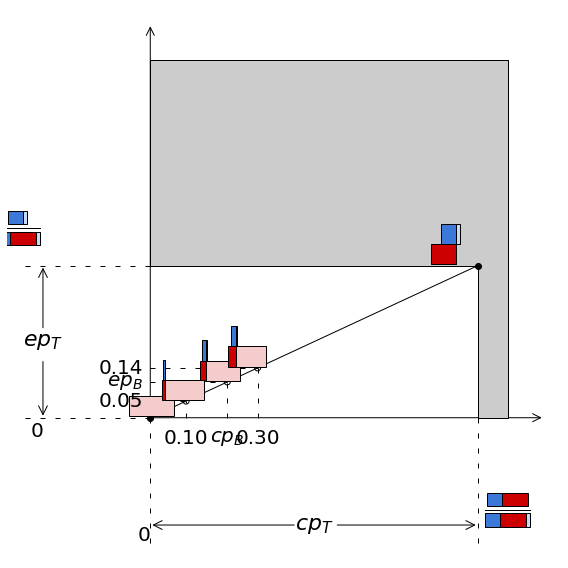

In [51]:
tp_b, fn_b, fp_b, tn_b = 4, 2, 1, 8

tp_b, fn_b, fp_b, tn_b = 5761, 4239, 37328, 52672
tp_b, fn_b, fp_b, tn_b = 8018, 1981, 13510, 76489

cp_t1 = 0.1
cp_t2 = 0.3
plot_ass3(tp_b, fn_b, fp_b, tn_b, cp_t1, cp_t2)

# assumption 4

In [52]:
def ass4(cp_t, tp_b, fn_b, fp_b, tn_b):
    tp_b, fn_b, fp_b, tn_b = normalize_metric(tp_b, fn_b, fp_b, tn_b)

    tpr_b = tp_b / (tp_b + fn_b)
    fpr_b = fp_b / (fp_b + tn_b)
    ppv_b = tp_b / (tp_b + fp_b)
    npv_b = tn_b / (tn_b + fn_b)
    
    # Assumption 4: only TP changes
    slope4 = (tn_b + fp_b) / (tn_b + fn_b)
    ep4 = slope4 * cp_t + 1 - npv_b / (1-fpr_b)
    ep4_val = 1 - (1-cp_t)*npv_b/(1-fpr_b)
    
    return ep4

In [53]:
def compute_cm_metric_ass4(cm_cp, cm_ep, tp, fn, fp, tn):
#     cm_tn / cm_fp = tn / fp
#     cm_tn / cm_fn = tn / fn
#     cm_tn + cm_fn = 1 - cm_cp
#     cm_tp + cm_fp = cm_cp
    
#     cm_tn + cm_fn = tn / fn * cm_fn + cm_fn = 1 - cm_cp
    
    cm_fn = (1 - cm_cp) / (tn / fn + 1)
    cm_tn = tn / fn * cm_fn
    cm_fp = fp / tn * cm_tn
    cm_tp = 1 - cm_fp - cm_tn - cm_fn
    
    return normalize_metric(cm_tp, cm_fn, cm_fp, cm_tn)

In [54]:
def plot_ass4(tp, fn, fp, tn, cp_t1, cp_t2):
    tp, fn, fp, tn = normalize_metric(tp, fn, fp, tn)

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)

    cp = tp + fp
    ep = tp + fn

    print(f'tp: {tp:.4f}, fn: {fn:.4f}, fp: {fp:.4f}, tn: {tn:.4f}')
    print(f'cp: {cp:.4f}, ep: {ep:.4f}')
    print(f'tpr: {tpr:.4f}, fpr: {fpr:.4f}')
    print(f'ppv: {ppv:.4f}, npv: {npv:.4f}')
    
    # prepare the canvas
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)

    # base x and y axis
    ax.annotate('', xy=(0, 1.1), xytext=(0, 0),
                arrowprops=dict(arrowstyle='->', lw=1), fontsize=20, zorder=-30)

    ax.annotate('', xy=(1.1, 0), xytext=(0, 0),
                arrowprops=dict(arrowstyle='->', lw=1), fontsize=20, zorder=-30)

    # TODO: this block is assumption-dependent
    # start of the block
    # two non-compatible areas
    nc_rect1 = Rectangle((0, 0), 1, fn / (fp+fn+tn), 
                         fc=light_gray_color, color='black', linewidth=1, zorder=-30)
    ax.add_patch(nc_rect1)

    nc_rect2 = Rectangle((0, 0), fp / (fp+fn+tn), 1,
                         fc=light_gray_color, color='black', linewidth=1, zorder=-30)
    ax.add_patch(nc_rect2)
    
    nc_rect1 = Rectangle((fp / (fp+fn+tn) - 0.01, 0), 0.02, fn / (fp+fn+tn)-0.004, 
                         fc=light_gray_color, color='black', linewidth=0, zorder=-30)
    ax.add_patch(nc_rect1)

    # annotation on the x-axis
    x_left_bound = fp / (fp+fn+tn)
    x_right_bound = 1
    x_left_bound_text = '-'
    x_right_bound_text = '1'
    x_text_upper_margin = 0.03
    x_label_upper_margin = 0.3
    x_dashed_limit = 0.35

#     plt.text(x_left_bound, -x_label_upper_margin, x_left_bound_text, 
#              ha='right', va='top', size=20)
    plt.text(x_right_bound, -x_text_upper_margin, x_right_bound_text, 
             ha='left', va='top', size=20)

    plt.vlines(x=x_left_bound, ymin=-x_dashed_limit, ymax=fn / (fp+fn+tn), 
               ls=(0, (5, 10)), color='black', lw=1)
    plt.vlines(x=x_right_bound, ymin=-x_dashed_limit, ymax=0, 
               ls=(0, (5, 10)), color='black', lw=1)

    ax.annotate('$cp_T$', 
                xy=(x_right_bound, -x_label_upper_margin), 
                xytext=((x_left_bound+x_right_bound)/2, -x_label_upper_margin), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle='->'), fontsize=22)
    ax.annotate('', 
                xy=(x_left_bound, -x_label_upper_margin), 
                xytext=((x_left_bound+x_right_bound)/2-0.05, -x_label_upper_margin), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle='->'), fontsize=22)

    # annotation on the y-axis
    y_upper_bound = 1
    y_lower_bound = fn / (fp+fn+tn)
    y_upper_bound_text = '1'
    y_lower_bound_text = '-'
    y_text_right_margin = 0.02
    y_label_right_margin = 0.3
    y_dashed_limit = 0.35
    
    plt.text(-y_label_right_margin, y_upper_bound+0.01, y_upper_bound_text, 
             ha='right', va='bottom', size=20)
#     plt.text(-y_label_right_margin, y_lower_bound-0.01, y_lower_bound_text, 
#              ha='right', va='top', size=20)

    plt.hlines(y=y_upper_bound, xmin=-y_dashed_limit, xmax=0, 
               ls=(0, (5, 10)), color='black', lw=1)
    plt.hlines(y=y_lower_bound, xmin=-y_dashed_limit, xmax=x_left_bound, 
               ls=(0, (5, 10)), color='black', lw=1)

    ax.annotate('$ep_T$', xy=(-y_label_right_margin, y_upper_bound), 
                xytext=(-y_label_right_margin, (y_upper_bound+y_lower_bound)/2), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle="->"), fontsize=22)
    ax.annotate('', xy=(-y_label_right_margin, y_lower_bound), 
                xytext=(-y_label_right_margin, (y_upper_bound+y_lower_bound)/2-0.05), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle="->"), fontsize=22)

    # three case points
    ep_t1 = ass4(cp_t1, tp, fn, fp, tn)
    ep_t2 = ass4(cp_t2, tp, fn, fp, tn)
    cp_left = x_left_bound
    cp_right = x_right_bound
    ep_left = ass4(cp_left, tp, fn, fp, tn)
    ep_right = ass4(cp_right, tp, fn, fp, tn)
    
    print(cp_left, ep_left)
    print('val', cp_right, ep_right)
    ax.scatter([cp, cp_t1, cp_t2], [ep, ep_t1, ep_t2], ec='black', fc='none', linewidth=1)
    
    # two end points
    ax.plot([cp_left, cp_right], [ep_left, ep_right], 'ok-', linewidth=1, zorder=-10)
#     ax.scatter([0, 1], [1-npv, ppv], ec='black', fc='black', linewidth=1)

    left_bound = max(tp, fp)
    right_bound = max(tn, fn)

    rect_height = (left_bound + right_bound) / 2
    
    scale = 8
    cm_left_bound = left_bound / scale
    cm_right_bound = right_bound / scale
    rect_linewidth = 1 / scale
    # setting the rect height this way will make the figure look square
    rect_height = (cm_left_bound + cm_right_bound) / 2

    for idx, cm_cp, cm_ep in zip(['', '', 'B', 1, 2], [cp_left, cp_right, cp, cp_t1, cp_t2], [ep_left, ep_right, ep, ep_t1, ep_t2]):            
        if cp_left < cm_cp < cp_right and ep_left < cm_ep < ep_right:
            plt.vlines(x=cm_cp, ymin=0, ymax=cm_ep, ls=(0, (5, 10)), color='black', lw=1, zorder=-10)
            plt.hlines(y=cm_ep, xmin=0, xmax=cm_cp, ls=(0, (5, 10)), color='black', lw=1, zorder=-10)
            if idx == 'B':
                plt.text(cm_cp, -x_text_upper_margin, '$cp_{}$'.format(idx), 
                         ha='center', va='top', size=20)
                plt.text(-y_text_right_margin, cm_ep, '$ep_{}$'.format(idx), 
                          ha='right', va='center', size=20)
            else:
                plt.text(cm_cp, -x_text_upper_margin, f'{cm_cp:.2f}', 
                         ha='center', va='top', size=20)
                plt.text(-y_text_right_margin, cm_ep, f'{cm_ep:.2f}', 
                         ha='right', va='center', size=20)

        center_point_x = cm_cp - 0.06
        if cm_ep == 1:
            center_point_y = cm_ep + 0.06 - rect_height
        else:
            center_point_y = cm_ep + 0.06

        cm_tp, cm_fn, cm_fp, cm_tn = compute_cm_metric_ass4(cm_cp, cm_ep, tp, fn, fp, tn)

        cm_tp /= scale
        cm_fn /= scale
        cm_fp /= scale
        cm_tn /= scale
        
        print(cm_tp, cm_fn, cm_fp, cm_tn)

        if cm_tp > 0:
            tp_rect = Rectangle((center_point_x - cm_tp, center_point_y),
                                cm_tp, rect_height,
                                fc=tp_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(tp_rect)

        if cm_fn > 0:
            fn_rect = Rectangle((center_point_x, center_point_y),
                                cm_fn, rect_height,
                                fc=fn_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(fn_rect)

        if cm_fp > 0:
            fp_rect = Rectangle((center_point_x - cm_fp, center_point_y - rect_height),
                                cm_fp, rect_height,
                                fc=fp_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(fp_rect)

        if cm_tn > 0:
            tn_rect = Rectangle((center_point_x, center_point_y - rect_height),
                                cm_tn, rect_height,
                                fc=tn_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(tn_rect)

    # one end point (along y)
    point1_x, point1_y = cp_left, ep_left
    cm_tp, cm_fn, cm_fp, cm_tn = compute_cm_metric_ass4(point1_x, point1_y, tp, fn, fp, tn)
    cm_tn /= scale
    cm_fn /= scale
    cm_fp /= scale
    
    total = cm_tn + cm_fn + cm_fp
    new_height = rect_height*2/3

    center_point_x = -y_label_right_margin - total/2
    center_point_y = ep_left

    print(cm_tp, cm_fn, cm_fp, cm_tn, new_height)

    if cm_fp > 0:        
        fp_rect = Rectangle((center_point_x + cm_fn, center_point_y - 0.04 - 2 * new_height),
                            cm_fp, new_height,
                            fc=fp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fp_rect)

    if cm_fn > 0:        
        fn_rect = Rectangle((center_point_x + total / 2 - cm_fn/2, center_point_y - 0.02 - new_height),
                            cm_fn, new_height,
                            fc=fn_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fn_rect)
        
        fn_rect = Rectangle((center_point_x, center_point_y - 0.04 - 2 * new_height),
                            cm_fn, new_height,
                            fc=fn_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fn_rect)
    
    if cm_tn > 0:
        tn_rect = Rectangle((center_point_x + cm_fn + cm_fp, center_point_y - 0.04 - 2 * new_height),
                            cm_tn, new_height,
                            fc=tn_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tn_rect)


    ax.plot([center_point_x, center_point_x + total], [center_point_y - 0.03 - new_height, center_point_y - 0.03 - new_height], 'k-', linewidth=1)

    # the other end point
    point2_x, point2_y = cp_left, ep_left
    cm_tp, cm_fn, cm_fp, cm_tn = compute_cm_metric_ass4(point2_x, point2_y, tp, fn, fp, tn)
    cm_tn /= scale
    cm_fn /= scale
    cm_fp /= scale
    total = cm_tn + cm_fn + cm_fp
    new_height = rect_height*2/3
    
    center_point_x = point2_x - 0.15
    center_point_y = -x_label_upper_margin
    
    print(cm_tp, cm_fn, cm_fp, cm_tn, new_height)
    if cm_tn > 0:
        tn_rect = Rectangle((center_point_x + cm_fn + cm_fp, center_point_y - 0.02 - new_height),
                            cm_tn, new_height,
                            fc=tn_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tn_rect)

    if cm_fp > 0:
        fp_rect = Rectangle((center_point_x + total/2 - cm_fp/2, center_point_y + 0.02),
                            cm_fp, new_height,
                            fc=fp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fp_rect)
        
        fp_rect = Rectangle((center_point_x + cm_fn, center_point_y - 0.02 - new_height),
                            cm_fp, new_height,
                            fc=fp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fp_rect)
    
    if cm_fn > 0:
        fn_rect = Rectangle((center_point_x, center_point_y - 0.02 - new_height),
                            cm_fn, new_height,
                            fc=fn_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fn_rect)

    ax.plot([center_point_x, center_point_x + total], 
            [center_point_y, center_point_y], 'k-', linewidth=1)
    
#     # the other end point
#     point2_x, point2_y = fpr, 0
#     cm_tp, cm_fn, cm_fp, cm_tn = compute_cm_metric_ass1(point2_x, point2_y, tp, fn, fp, tn)
#     cm_fp /= scale
#     cm_tn /= scale
#     new_height = rect_height*2/3

#     center_point_x = point2_x - 0.01 - cm_tn
#     center_point_y = x_label_upper_margin
    
#     if cm_fp > 0:
#         fp_rect = Rectangle((center_point_x - cm_fp + cm_tn/2, -center_point_y + 0.01),
#                             cm_fp, new_height,
#                             fc=fp_color,
#                             color ='black',
#                             linewidth = 1)
#         ax.add_patch(fp_rect)

#         fp_rect = Rectangle((center_point_x - cm_fp, -center_point_y - new_height - 0.01),
#                             cm_fp, new_height,
#                             fc=fp_color,
#                             color ='black',
#                             linewidth = 1)
#         ax.add_patch(fp_rect)

#     if cm_tn > 0:
#         tn_rect = Rectangle((center_point_x, -center_point_y - new_height - 0.01),
#                             cm_tn, new_height,
#                             fc=tn_color,
#                             color ='black',
#                             linewidth = 1)
#         ax.add_patch(tn_rect)

#     ax.plot([center_point_x - cm_fp, center_point_x + cm_tn], [-center_point_y, -center_point_y], 'k-', linewidth=1)


    # canvas size
    ax.set_xlim(-0.4, 1.15)
    ax.set_ylim(-0.4, 1.15)

    plt.axis('off')
    plt.tight_layout()
    # plt.show()
    plt.savefig('assumption4.png', dpi=1000)

tp: 0.2667, fn: 0.1333, fp: 0.0667, tn: 0.5333
cp: 0.3333, ep: 0.4000
tpr: 0.6667, fpr: 0.1111
ppv: 0.8000, npv: 0.8000
0.0909090909090909 0.18181818181818166
val 1 0.9999999999999998
-6.938893903907228e-18 0.022727272727272728 0.011363636363636364 0.09090909090909091
0.125 0.0 0.0 0.0
0.03333333333333332 0.01666666666666667 0.008333333333333335 0.06666666666666668
0.015000000000000003 0.02 0.01 0.08
0.056249999999999994 0.0125 0.00625 0.05
-5.551115123125783e-17 0.022727272727272728 0.011363636363636364 0.09090909090909091 0.03333333333333333
-5.551115123125783e-17 0.022727272727272728 0.011363636363636364 0.09090909090909091 0.03333333333333333


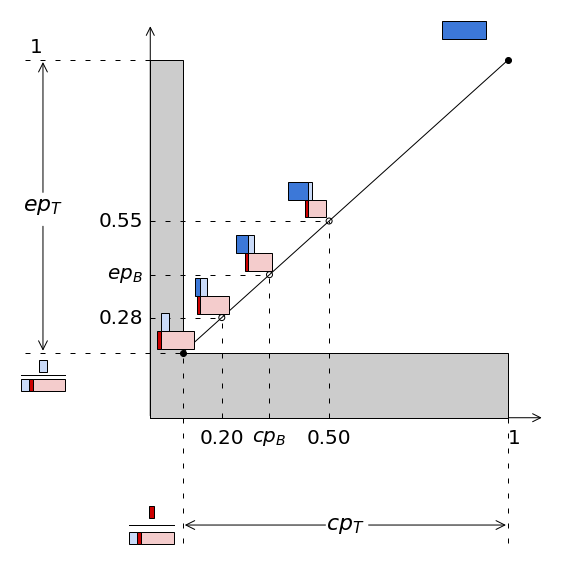

In [55]:
tp_b, fn_b, fp_b, tn_b = 4, 2, 1, 8
cp_t1 = 0.2
cp_t2 = 0.5
plot_ass4(tp_b, fn_b, fp_b, tn_b, cp_t1, cp_t2)

# assumption 5

In [56]:
def ass5(cp_t, tp_b, fn_b, fp_b, tn_b):
    tp_b, fn_b, fp_b, tn_b = normalize_metric(tp_b, fn_b, fp_b, tn_b)

    tpr_b = tp_b / (tp_b + fn_b)
    fpr_b = fp_b / (fp_b + tn_b)
    ppv_b = tp_b / (tp_b + fp_b)
    npv_b = tn_b / (tn_b + fn_b)
    
    # Assumption 5: only FN changes
    slope5 = -(fp_b + tn_b) / (fp_b + tp_b)
    ep5 = slope5 * cp_t + 1
    ep5_val = 1 - cp_t * (1-ppv_b) / fpr_b
    
    return ep5

In [57]:
def compute_cm_metric_ass5(cm_cp, cm_ep, tp, fn, fp, tn):
#     cm_tp / cm_fp = tp / fp
#     cm_tn / cm_fp = tn / fp
#     cm_tp + cm_fp = cm_cp
    
#     cm_tp + cm_fp = tp / fp * cm_fp + cm_fp = cm_cp
    
    cm_fp = cm_cp / (tp / fp + 1)
    cm_tp = tp / fp * cm_fp
    cm_tn = tn / fp * cm_fp
    cm_fn = 1 - cm_tp - cm_fp - cm_tn
    
    return normalize_metric(cm_tp, cm_fn, cm_fp, cm_tn)

In [58]:
def plot_ass5(tp, fn, fp, tn, cp_t1, cp_t2):
    tp, fn, fp, tn = normalize_metric(tp, fn, fp, tn)

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)

    cp = tp + fp
    ep = tp + fn

    print(f'tp: {tp:.4f}, fn: {fn:.4f}, fp: {fp:.4f}, tn: {tn:.4f}')
    print(f'cp: {cp:.4f}, ep: {ep:.4f}')
    print(f'tpr: {tpr:.4f}, fpr: {fpr:.4f}')
    print(f'ppv: {ppv:.4f}, npv: {npv:.4f}')
    
    # prepare the canvas
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)

    # base x and y axis
    ax.annotate('', xy=(0, 1.1), xytext=(0, 0),
                arrowprops=dict(arrowstyle='->', lw=1), fontsize=20, zorder=-30)

    ax.annotate('', xy=(1.1, 0), xytext=(0, 0),
                arrowprops=dict(arrowstyle='->', lw=1), fontsize=20, zorder=-30)

    # TODO: this block is assumption-dependent
    # start of the block
    # two non-compatible areas
    nc_rect1 = Rectangle((0, 0), 1, tp / (tp+fp+tn), 
                         fc=light_gray_color, color='black', linewidth=1, zorder=-30)
    ax.add_patch(nc_rect1)

    nc_rect2 = Rectangle(((tp + fp) / (tp+fp+tn), 0), tn / (tp+fp+tn), 1,
                         fc=light_gray_color, color='black', linewidth=1, zorder=-30)
    ax.add_patch(nc_rect2)
    
    nc_rect1 = Rectangle(((tp + fp) / (tp+fp+tn) - 0.01, 0), 0.02, tp / (tp+fp+tn)-0.004, 
                         fc=light_gray_color, color='black', linewidth=0, zorder=-30)
    ax.add_patch(nc_rect1)

    # annotation on the x-axis
    x_left_bound = 0
    x_right_bound = (tp + fp) / (tp+fp+tn)
    x_left_bound_text = '0'
    x_right_bound_text = '-'
    x_text_upper_margin = 0.03
    x_label_upper_margin = 0.3
    x_dashed_limit = 0.35
    
    # annotation on the y-axis
    y_upper_bound = 1
    y_lower_bound = tp / (tp+fp+tn)
    y_upper_bound_text = '1'
    y_lower_bound_text = '-'
    y_text_right_margin = 0.02
    y_label_right_margin = 0.3
    y_dashed_limit = 0.35

    plt.text(x_left_bound, -x_label_upper_margin, x_left_bound_text, 
             ha='right', va='top', size=20)
#     plt.text(x_right_bound, -x_text_upper_margin, x_right_bound_text, 
#              ha='left', va='top', size=20)

    plt.vlines(x=x_left_bound, ymin=-x_dashed_limit, ymax=0, 
               ls=(0, (5, 10)), color='black', lw=1)
    plt.vlines(x=x_right_bound, ymin=-x_dashed_limit, ymax=y_lower_bound, 
               ls=(0, (5, 10)), color='black', lw=1)

    ax.annotate('$cp_T$', 
                xy=(x_right_bound, -x_label_upper_margin), 
                xytext=((x_left_bound+x_right_bound)/2, -x_label_upper_margin), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle='->'), fontsize=22)
    ax.annotate('', 
                xy=(x_left_bound, -x_label_upper_margin), 
                xytext=((x_left_bound+x_right_bound)/2-0.05, -x_label_upper_margin), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle='->'), fontsize=22)
    
    plt.text(-y_label_right_margin, y_upper_bound+0.01, y_upper_bound_text, 
             ha='right', va='bottom', size=20)
#     plt.text(-y_label_right_margin, y_lower_bound-0.01, y_lower_bound_text, 
#              ha='right', va='top', size=20)

    plt.hlines(y=y_upper_bound, xmin=-y_dashed_limit, xmax=0, 
               ls=(0, (5, 10)), color='black', lw=1)
    plt.hlines(y=y_lower_bound, xmin=-y_dashed_limit, xmax=x_left_bound, 
               ls=(0, (5, 10)), color='black', lw=1)

    ax.annotate('$ep_T$', xy=(-y_label_right_margin, y_upper_bound), 
                xytext=(-y_label_right_margin, (y_upper_bound+y_lower_bound)/2), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle="->"), fontsize=22)
    ax.annotate('', xy=(-y_label_right_margin, y_lower_bound), 
                xytext=(-y_label_right_margin, (y_upper_bound+y_lower_bound)/2-0.05), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle="->"), fontsize=22)

    # three case points
    ep_t1 = ass5(cp_t1, tp, fn, fp, tn)
    ep_t2 = ass5(cp_t2, tp, fn, fp, tn)
    cp_left = x_left_bound
    cp_right = x_right_bound
    ep_left = ass5(cp_left, tp, fn, fp, tn)
    ep_right = ass5(cp_right, tp, fn, fp, tn)
    
    print(cp_left, ep_left)
    print('val', cp_right, ep_right)
    ax.scatter([cp, cp_t1], [ep, ep_t1], ec='black', fc='none', linewidth=1)
    
    # two end points
    ax.plot([cp_left, cp_right], [ep_left, ep_right], 'ok-', linewidth=1, zorder=-10)
#     ax.scatter([0, 1], [1-npv, ppv], ec='black', fc='black', linewidth=1)

    left_bound = max(tp, fp)
    right_bound = max(tn, fn)

    rect_height = (left_bound + right_bound) / 2
    
    scale = 8
    cm_left_bound = left_bound / scale
    cm_right_bound = right_bound / scale
    rect_linewidth = 1 / scale
    # setting the rect height this way will make the figure look square
    rect_height = (cm_left_bound + cm_right_bound) / 2

    for idx, cm_cp, cm_ep in zip(['', '', 'B', 1], [cp_left, cp_right, cp, cp_t1], [ep_left, ep_right, ep, ep_t1]):            
        if cp_left < cm_cp < cp_right and ep_left > cm_ep > ep_right:
            plt.vlines(x=cm_cp, ymin=0, ymax=cm_ep, ls=(0, (5, 10)), color='black', lw=1, zorder=-10)
            plt.hlines(y=cm_ep, xmin=0, xmax=cm_cp, ls=(0, (5, 10)), color='black', lw=1, zorder=-10)
            if idx == 'B':
                plt.text(cm_cp, -x_text_upper_margin, '$cp_{}$'.format(idx), 
                         ha='center', va='top', size=20)
                plt.text(-y_text_right_margin, cm_ep, '$ep_{}$'.format(idx), 
                          ha='right', va='center', size=20)
            else:
                plt.text(cm_cp, -x_text_upper_margin, f'{cm_cp:.2f}', 
                         ha='center', va='top', size=20)
                plt.text(-y_text_right_margin, cm_ep, f'{cm_ep:.2f}', 
                         ha='right', va='center', size=20)

        if idx == 'B':
            center_point_x = cm_cp - 0.08
        else:
            center_point_x = cm_cp + 0.05
        center_point_y = cm_ep

        cm_tp, cm_fn, cm_fp, cm_tn = compute_cm_metric_ass5(cm_cp, cm_ep, tp, fn, fp, tn)

        cm_tp /= scale
        cm_fn /= scale
        cm_fp /= scale
        cm_tn /= scale
        
        print(cm_tp, cm_fn, cm_fp, cm_tn)

        if cm_tp > 0:
            tp_rect = Rectangle((center_point_x - cm_tp, center_point_y),
                                cm_tp, rect_height,
                                fc=tp_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(tp_rect)

        if cm_fn > 0:
            fn_rect = Rectangle((center_point_x, center_point_y),
                                cm_fn, rect_height,
                                fc=fn_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(fn_rect)

        if cm_fp > 0:
            fp_rect = Rectangle((center_point_x - cm_fp, center_point_y - rect_height),
                                cm_fp, rect_height,
                                fc=fp_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(fp_rect)

        if cm_tn > 0:
            tn_rect = Rectangle((center_point_x, center_point_y - rect_height),
                                cm_tn, rect_height,
                                fc=tn_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(tn_rect)

    # one end point (along y)
    point1_x, point1_y = cp_right, ep_right
    cm_tp, cm_fn, cm_fp, cm_tn = compute_cm_metric_ass5(point1_x, point1_y, tp, fn, fp, tn)
    cm_tp /= scale
    cm_fp /= scale
    cm_tn /= scale
    
    total = cm_tp + cm_fp + cm_tn
    new_height = rect_height*2/3

    center_point_x = -y_label_right_margin - total/2
    center_point_y = cm_tp / total

    print(cm_tp, cm_fn, cm_fp, cm_tn, new_height)

    if cm_fp > 0:        
        fp_rect = Rectangle((center_point_x + cm_tp, center_point_y - 0.04 - 2 * new_height),
                            cm_fp, new_height,
                            fc=fp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fp_rect)

    if cm_tp > 0:        
        tp_rect = Rectangle((center_point_x + total / 2 - cm_tp/2, center_point_y - 0.02 - new_height),
                            cm_tp, new_height,
                            fc=tp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tp_rect)
        
        tp_rect = Rectangle((center_point_x, center_point_y - 0.04 - 2 * new_height),
                            cm_tp, new_height,
                            fc=tp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tp_rect)
    
    if cm_tn > 0:
        tn_rect = Rectangle((center_point_x + cm_tp + cm_fp, center_point_y - 0.04 - 2 * new_height),
                            cm_tn, new_height,
                            fc=tn_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tn_rect)


    ax.plot([center_point_x, center_point_x + total], [center_point_y - 0.03 - new_height, center_point_y - 0.03 - new_height], 'k-', linewidth=1)

    # the other end point
    point2_x, point2_y = cp_right, ep_right
    cm_tp, cm_fn, cm_fp, cm_tn = compute_cm_metric_ass5(point2_x, point2_y, tp, fn, fp, tn)
    cm_tp /= scale
    cm_fp /= scale
    cm_tn /= scale
    total = cm_tp + cm_fp + cm_tn
    new_height = rect_height*2/3
    
    center_point_x = point2_x + 0.02
    center_point_y = -x_label_upper_margin
    
    print(cm_tp, cm_fn, cm_fp, cm_tn, new_height)
    if cm_tn > 0:
        tn_rect = Rectangle((center_point_x + cm_tp + cm_fp, center_point_y - 0.02 - new_height),
                            cm_tn, new_height,
                            fc=tn_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tn_rect)

    if cm_tp > 0:
        tp_rect = Rectangle((center_point_x + total/2 - cm_tp/2, center_point_y + 0.02),
                            cm_tp, new_height,
                            fc=tp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tp_rect)
        
        tp_rect = Rectangle((center_point_x, center_point_y - 0.02 - new_height),
                            cm_tp, new_height,
                            fc=tp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tp_rect)
    
    if cm_fp > 0:
        fp_rect = Rectangle((center_point_x + total/2 + cm_tp/2, center_point_y + 0.02),
                            cm_fp, new_height,
                            fc=fp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fp_rect)
        
        fp_rect = Rectangle((center_point_x + cm_tp, center_point_y - 0.02 - new_height),
                            cm_fp, new_height,
                            fc=fp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fp_rect)

    ax.plot([center_point_x, center_point_x + total], 
            [center_point_y, center_point_y], 'k-', linewidth=1)
    
    # canvas size
    ax.set_xlim(-0.4, 1.15)
    ax.set_ylim(-0.4, 1.15)

    plt.axis('off')
    plt.tight_layout()
    # plt.show()
    plt.savefig('assumption5.png', dpi=1000)

tp: 0.2667, fn: 0.1333, fp: 0.0667, tn: 0.5333
cp: 0.3333, ep: 0.4000
tpr: 0.6667, fpr: 0.1111
ppv: 0.8000, npv: 0.8000
0 1.0
val 0.3846153846153846 0.3076923076923077
0.0 0.125 0.0 0.0
0.03846153846153846 1.3877787807814457e-17 0.009615384615384614 0.07692307692307691
0.03333333333333333 0.016666666666666677 0.008333333333333333 0.06666666666666667
0.02 0.05999999999999999 0.005 0.04
0.03846153846153846 1.1102230246251565e-16 0.009615384615384614 0.07692307692307691 0.03333333333333333
0.03846153846153846 1.1102230246251565e-16 0.009615384615384614 0.07692307692307691 0.03333333333333333


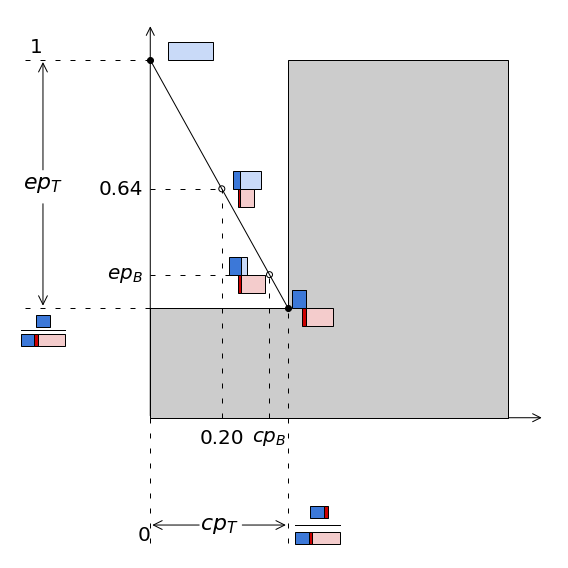

In [59]:
tp_b, fn_b, fp_b, tn_b = 4, 2, 1, 8
cp_t1 = 0.2
cp_t2 = 0.5
plot_ass5(tp_b, fn_b, fp_b, tn_b, cp_t1, cp_t2)

# assumption 6

In [60]:
def ass6(cp_t, tp_b, fn_b, fp_b, tn_b):
    tp_b, fn_b, fp_b, tn_b = normalize_metric(tp_b, fn_b, fp_b, tn_b)

    tpr_b = tp_b / (tp_b + fn_b)
    fpr_b = fp_b / (fp_b + tn_b)
    ppv_b = tp_b / (tp_b + fp_b)
    npv_b = tn_b / (tn_b + fn_b)
    
    # Assumption 6: only FP changes
    slope6 = -(fn_b + tp_b) / (fn_b + tn_b)
    ep6 = slope6 * cp_t + (fn_b + tp_b) / (fn_b + tn_b)
    ep6_val = (1 - cp_t) * (1 - npv_b) / (1 - tpr_b)
    
    return ep6

In [61]:
def compute_cm_metric_ass6(cm_cp, cm_ep, tp, fn, fp, tn):
#     cm_tp / cm_fn = tp / fn
#     cm_tn / cm_fn = tn / fn
#     cm_tn + cm_fn = 1 - cm_cp
    
#     cm_tn + cm_fn = tn / fn * cm_fn + cm_fn = 1 - cm_cp
    
    cm_fn = (1 - cm_cp) / (tn / fn + 1)
    cm_tn = tn / fn * cm_fn
    cm_tp = tp / fn * cm_fn
    cm_fp = 1 - cm_tp - cm_fn - cm_tn
    
    return normalize_metric(cm_tp, cm_fn, cm_fp, cm_tn)

In [62]:
def plot_ass6(tp, fn, fp, tn, cp_t1, cp_t2):
    tp, fn, fp, tn = normalize_metric(tp, fn, fp, tn)

    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    ppv = tp / (tp + fp)
    npv = tn / (tn + fn)

    cp = tp + fp
    ep = tp + fn
    
    total = tp + fn + tn

    print(f'tp: {tp:.4f}, fn: {fn:.4f}, fp: {fp:.4f}, tn: {tn:.4f}')
    print(f'cp: {cp:.4f}, ep: {ep:.4f}')
    print(f'tpr: {tpr:.4f}, fpr: {fpr:.4f}')
    print(f'ppv: {ppv:.4f}, npv: {npv:.4f}')
    
    # prepare the canvas
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111)

    # base x and y axis
    ax.annotate('', xy=(0, 1.1), xytext=(0, 0),
                arrowprops=dict(arrowstyle='->', lw=1), fontsize=20, zorder=-30)

    ax.annotate('', xy=(1.1, 0), xytext=(0, 0),
                arrowprops=dict(arrowstyle='->', lw=1), fontsize=20, zorder=-30)

    # TODO: this block is assumption-dependent
    # start of the block
    # two non-compatible areas
    nc_rect1 = Rectangle((0, 0), tp / total, 1, 
                         fc=light_gray_color, color='black', linewidth=1, zorder=-30)
    ax.add_patch(nc_rect1)

    nc_rect2 = Rectangle((0, (tp + fn) / total), 1, tn / total,
                         fc=light_gray_color, color='black', linewidth=1, zorder=-30)
    ax.add_patch(nc_rect2)
    
    nc_rect1 = Rectangle((0, (tp + fn) / total - 0.01), tp / total-0.004, 0.02, 
                         fc=light_gray_color, color='black', linewidth=0, zorder=-30)
    ax.add_patch(nc_rect1)

    # annotation on the x-axis
    x_left_bound = tp / total
    x_right_bound = 1
    x_left_bound_text = '-'
    x_right_bound_text = '1'
    x_text_upper_margin = 0.03
    x_label_upper_margin = 0.3
    x_dashed_limit = 0.35
    
    # annotation on the y-axis
    y_upper_bound = (tp + fn) / total
    y_lower_bound = 0
    y_upper_bound_text = '-'
    y_lower_bound_text = '0'
    y_text_right_margin = 0.02
    y_label_right_margin = 0.3
    y_dashed_limit = 0.35

#     plt.text(x_left_bound, -x_label_upper_margin, x_left_bound_text, 
#              ha='right', va='top', size=20)
    plt.text(x_right_bound, -x_text_upper_margin, x_right_bound_text, 
             ha='left', va='top', size=20)

    plt.vlines(x=x_left_bound, ymin=-x_dashed_limit, ymax=0, 
               ls=(0, (5, 10)), color='black', lw=1)
    plt.vlines(x=x_right_bound, ymin=-x_dashed_limit, ymax=y_lower_bound, 
               ls=(0, (5, 10)), color='black', lw=1)

    ax.annotate('$cp_T$', 
                xy=(x_right_bound, -x_label_upper_margin), 
                xytext=((x_left_bound+x_right_bound)/2, -x_label_upper_margin), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle='->'), fontsize=22)
    ax.annotate('', 
                xy=(x_left_bound, -x_label_upper_margin), 
                xytext=((x_left_bound+x_right_bound)/2-0.05, -x_label_upper_margin), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle='->'), fontsize=22)
    
#     plt.text(-y_label_right_margin, y_upper_bound+0.01, y_upper_bound_text, 
#              ha='right', va='bottom', size=20)
    plt.text(-y_label_right_margin, y_lower_bound-0.01, y_lower_bound_text, 
             ha='right', va='top', size=20)

    plt.hlines(y=y_upper_bound, xmin=-y_dashed_limit, xmax=x_left_bound, 
               ls=(0, (5, 10)), color='black', lw=1)
    plt.hlines(y=y_lower_bound, xmin=-y_dashed_limit, xmax=0, 
               ls=(0, (5, 10)), color='black', lw=1)

    ax.annotate('$ep_T$', xy=(-y_label_right_margin, y_upper_bound), 
                xytext=(-y_label_right_margin, (y_upper_bound+y_lower_bound)/2), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle="->"), fontsize=22)
    ax.annotate('', xy=(-y_label_right_margin, y_lower_bound), 
                xytext=(-y_label_right_margin, (y_upper_bound+y_lower_bound)/2-0.05), 
                ha='center', va='center',
                arrowprops=dict(arrowstyle="->"), fontsize=22)

    # three case points
    ep_t1 = ass6(cp_t1, tp, fn, fp, tn)
    ep_t2 = ass6(cp_t2, tp, fn, fp, tn)
    cp_left = x_left_bound
    cp_right = x_right_bound
    ep_left = ass6(cp_left, tp, fn, fp, tn)
    ep_right = ass6(cp_right, tp, fn, fp, tn)
    
    print(cp_left, ep_left)
    print('val', cp_right, ep_right)
    ax.scatter([cp, cp_t2], [ep, ep_t2], ec='black', fc='none', linewidth=1)
    
    # two end points
    ax.plot([cp_left, cp_right], [ep_left, ep_right], 'ok-', linewidth=1, zorder=-10)
#     ax.scatter([0, 1], [1-npv, ppv], ec='black', fc='black', linewidth=1)

    left_bound = max(tp, fp)
    right_bound = max(tn, fn)

    rect_height = (left_bound + right_bound) / 2
    
    scale = 8
    cm_left_bound = left_bound / scale
    cm_right_bound = right_bound / scale
    rect_linewidth = 1 / scale
    # setting the rect height this way will make the figure look square
    rect_height = (cm_left_bound + cm_right_bound) / 2

    for idx, cm_cp, cm_ep in zip(['', '', 'B', 2], [cp_left, cp_right, cp, cp_t2], [ep_left, ep_right, ep, ep_t2]):            
        print('cm_cp', cm_cp, 'cm_ep', cm_ep)
        if cp_left < cm_cp < cp_right and ep_left > cm_ep > ep_right:
            plt.vlines(x=cm_cp, ymin=0, ymax=cm_ep, ls=(0, (5, 10)), color='black', lw=1, zorder=-10)
            plt.hlines(y=cm_ep, xmin=0, xmax=cm_cp, ls=(0, (5, 10)), color='black', lw=1, zorder=-10)
            if idx == 'B':
                plt.text(cm_cp, -x_text_upper_margin, '$cp_{}$'.format(idx), 
                         ha='center', va='top', size=20)
                plt.text(-y_text_right_margin, cm_ep, '$ep_{}$'.format(idx), 
                          ha='right', va='center', size=20)
            else:
                plt.text(cm_cp, -x_text_upper_margin, f'{cm_cp:.2f}', 
                         ha='center', va='top', size=20)
                plt.text(-y_text_right_margin, cm_ep, f'{cm_ep:.2f}', 
                         ha='right', va='center', size=20)

        if idx == 'B':
            center_point_y = cm_ep - 0.08
        else:
            center_point_y = cm_ep + 0.08
        center_point_x = cm_cp

        cm_tp, cm_fn, cm_fp, cm_tn = compute_cm_metric_ass6(cm_cp, cm_ep, tp, fn, fp, tn)

        cm_tp /= scale
        cm_fn /= scale
        cm_fp /= scale
        cm_tn /= scale
        
        print(cm_tp, cm_fn, cm_fp, cm_tn)

        if cm_tp > 0:
            tp_rect = Rectangle((center_point_x - cm_tp, center_point_y),
                                cm_tp, rect_height,
                                fc=tp_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(tp_rect)

        if cm_fn > 0:
            fn_rect = Rectangle((center_point_x, center_point_y),
                                cm_fn, rect_height,
                                fc=fn_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(fn_rect)

        if cm_fp > 0:
            fp_rect = Rectangle((center_point_x - cm_fp, center_point_y - rect_height),
                                cm_fp, rect_height,
                                fc=fp_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(fp_rect)

        if cm_tn > 0:
            tn_rect = Rectangle((center_point_x, center_point_y - rect_height),
                                cm_tn, rect_height,
                                fc=tn_color,
                                color ='black',
                                linewidth = 1)
            ax.add_patch(tn_rect)

    # one end point (along y)
    point1_x, point1_y = cp_left, ep_left
    cm_tp, cm_fn, cm_fp, cm_tn = compute_cm_metric_ass6(point1_x, point1_y, tp, fn, fp, tn)
    cm_tp /= scale
    cm_fn /= scale
    cm_tn /= scale
    
    total = cm_tp + cm_fn + cm_tn
    new_height = rect_height*2/3

    center_point_x = -y_label_right_margin - total/2
    center_point_y = (cm_tp + cm_fn) / total

    print(cm_tp, cm_fn, cm_fp, cm_tn, new_height)

    if cm_fn > 0:        
        fn_rect = Rectangle((center_point_x + total / 2 + cm_tp/2, center_point_y + 0.04 + new_height),
                            cm_fn, new_height,
                            fc=fn_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fn_rect)
        
        fn_rect = Rectangle((center_point_x + cm_tp, center_point_y + 0.02),
                            cm_fn, new_height,
                            fc=fn_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fn_rect)

    if cm_tp > 0:        
        tp_rect = Rectangle((center_point_x + total / 2 - cm_tp/2, center_point_y  + 0.04 + new_height),
                            cm_tp, new_height,
                            fc=tp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tp_rect)
        
        tp_rect = Rectangle((center_point_x, center_point_y + 0.02),
                            cm_tp, new_height,
                            fc=tp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tp_rect)
    
    if cm_tn > 0:
        tn_rect = Rectangle((center_point_x + cm_tp + cm_fn, center_point_y + 0.02),
                            cm_tn, new_height,
                            fc=tn_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tn_rect)


    ax.plot([center_point_x, center_point_x + total], [center_point_y + 0.03 + new_height, center_point_y + 0.03 + new_height], 'k-', linewidth=1)

    # the other end point
    point2_x, point2_y = cp_left, ep_left
    cm_tp, cm_fn, cm_fp, cm_tn = compute_cm_metric_ass6(point2_x, point2_y, tp, fn, fp, tn)
    cm_tp /= scale
    cm_fn /= scale
    cm_tn /= scale
    
    total = cm_tp + cm_fn + cm_tn
    new_height = rect_height*2/3
    
    center_point_x = point2_x - 0.15
    center_point_y = -x_label_upper_margin
    
    print(cm_tp, cm_fn, cm_fp, cm_tn, new_height)
    if cm_fn > 0:                
        fn_rect = Rectangle((center_point_x + cm_tp, center_point_y - 0.01 - new_height),
                            cm_fn, new_height,
                            fc=fn_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(fn_rect)

    if cm_tp > 0:        
        tp_rect = Rectangle((center_point_x + total / 2 - cm_tp/2, center_point_y  + 0.01),
                            cm_tp, new_height,
                            fc=tp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tp_rect)
        
        tp_rect = Rectangle((center_point_x, center_point_y - 0.01 - new_height),
                            cm_tp, new_height,
                            fc=tp_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tp_rect)
    
    if cm_tn > 0:
        tn_rect = Rectangle((center_point_x + cm_tp + cm_fn, center_point_y - 0.01 - new_height),
                            cm_tn, new_height,
                            fc=tn_color,
                            color ='black',
                            linewidth = 1)
        ax.add_patch(tn_rect)

    ax.plot([center_point_x, center_point_x + total], 
            [center_point_y, center_point_y], 'k-', linewidth=1)
    
    # canvas size
    ax.set_xlim(-0.4, 1.15)
    ax.set_ylim(-0.4, 1.15)

    plt.axis('off')
    plt.tight_layout()
    # plt.show()
    plt.savefig('assumption6.png', dpi=1000)

tp: 0.2667, fn: 0.1333, fp: 0.0667, tn: 0.5333
cp: 0.3333, ep: 0.4000
tpr: 0.6667, fpr: 0.1111
ppv: 0.8000, npv: 0.8000
0.2857142857142857 0.4285714285714286
val 1 0.0
cm_cp 0.2857142857142857 cm_ep 0.4285714285714286
0.03571428571428571 0.017857142857142856 0.0 0.07142857142857142
cm_cp 1 cm_ep 0.0
0.0 0.0 0.125 0.0
cm_cp 0.3333333333333333 cm_ep 0.4
0.03333333333333334 0.01666666666666667 0.008333333333333304 0.06666666666666668
cm_cp 0.5 cm_ep 0.30000000000000004
0.025 0.0125 0.037500000000000006 0.05
0.03571428571428571 0.017857142857142856 0.0 0.07142857142857142 0.03333333333333333
0.03571428571428571 0.017857142857142856 0.0 0.07142857142857142 0.03333333333333333


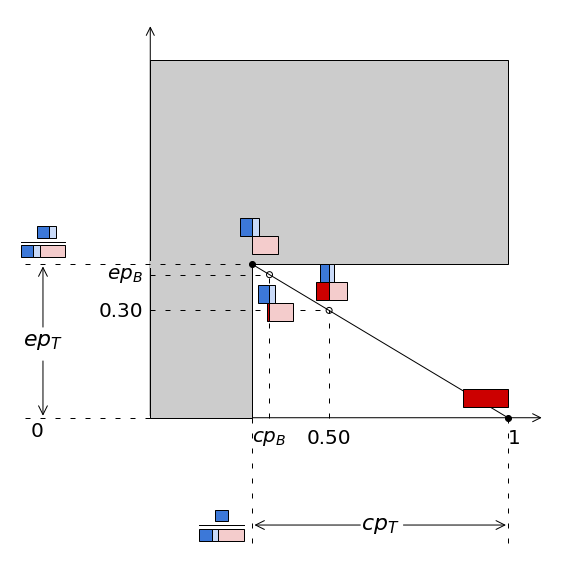

In [63]:
tp_b, fn_b, fp_b, tn_b = 4, 2, 1, 8
cp_t1 = 0.2
cp_t2 = 0.5
plot_ass6(tp_b, fn_b, fp_b, tn_b, cp_t1, cp_t2)